<a href="https://colab.research.google.com/github/gabriele-gangemi/projects/blob/main/ML_Intrusion_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color='orange'> **AN INTRUSION DETECTION LEARNING TASK**</font></center>

<h4 align="right"><font color='white'> Authors: <i>Gabriele Gangemi</i>

## <center><font color='orange'> **SUMMARY** </font></center>

- **CHAPTER 0:** Abstract
- **CHAPTER 1:** Aim of the project
- **CHAPTER 2:** Dataset description
- **CHAPTER 3:** Used models and tecniques
- **CHAPTER 4:** Data handling in practice
- **CHAPTER 5:** Classical ML models
- **CHAPTER 6:** Artificial Neural Networks
- **CHAPTER 7:** Results and best model selection
- **CHAPTER 8:** Conclusions

## <center><font color='orange'> **CHAPTER 0: ABSTRACT** </font></center>

<p align="justify">
Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders.  <b>The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between "bad" connections, called intrusions or attacks, and "good" normal connections</b>.

<p align="justify">
In 1998, the DARPA (Defense Advanced Research Projects Agency) Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  


<p align="justify">
The 1999 KDD intrusion detection contest uses a version of this dataset.


<p align="justify">
Lincoln Labs set up an environment to acquire nine weeks of raw TCP (ransmission Control Protocol) dump data for a local-area network (LAN) simulating a typical U.S. Air Force LAN.  They operated the LAN as if it were a true Air Force environment, but peppered it with multiple attacks.


<p align="justify">
The raw training data was about four gigabytes of compressed binary TCP dump data from seven weeks of network traffic.  This was processed into about five million connection records.  Similarly, the two weeks of test data yielded around two million connection records.


<p align="justify">
A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

http://kdd.ics.uci.edu/databases/kddcup99/task.html 


<br><br>

## <center><font color='orange'> **CHAPTER 1: AIM OF THE PROJECT** </font></center>

<p align="justify">So, having introduced the topic, we can easily predict what the purpose of our project is: try to implement models that are able, in a supervised way, to predict, starting from a certain number of features characterizing a log, if it can be considered as a "safe" log, or whether it should be considered an attack and, if so, what type.

<p align="justify">The question therefore arises spontaneously: why implement such a prediction system, when the characteristics of the log are available only after it has been carried out?

<p align="justify">In reality, the reasons are many: think, for example, that an attack in general may not have a very short duration, but could last over time. Having known this, it is useful to be able to take precautions instantly, starting from the information received, to try to minimize the risk.

<p align="justify">This approach therefore falls within the sphere of supervised learning, where the arrival set of the forecasts coincides with a discrete domain (we are therefore talking about classification).

<p align="justify">In order to achieve our aim, we will implement various models (both of "classic" Machine Learing, and Artificial Neural Networks). This, in order to predict which, on the particular instance, tend to guarantee higher performances, also taking into consideration their computational complexity, on which the execution time of the model itself strictly depends.

<p align="justify">Precisely due to the nature of the field of application under study, it is therefore good to consider that an execution time that is too high, albeit in the face of considerable performance, is not actually optimal.

<p align="justify">The model considered best, therefore, as the performance / execution time tradeoff was subsequently selected, and used to evaluate its performance on the training set.

<p align="justify">N.B .: As will be seen below, even if the models are not directly trained on a test set (which will be fed only to the most performing, again for reasons of necessary power), a k-fold will be implemented, to allow them to limit overfitting.

<br><br>

## <center><font color='orange'> **CHAPTER 2: DATASET DESCRIPTION** </font></center>

<p align="justify">During the last decade, anomaly detection has attracted the attention of many researchers to overcome the weakness of signature-based IDSs in detecting novel attacks, and KDDCUP’99 is the mostly widely used data set for the evaluation of these systems. 

<p align="justify">What we will carry out our analysis on will be a sub-portion of it (specifically, a train set of about 120,000 logs and a different test set of about 12,000 are considered).

<p align="justify"><b>Note that, for reasons related to the power of the computers (some models, as we will see, will take more than 40min to execute the task), the models have not been trained on all the instances, but on a sub-sub-portion of them. Specifically, a causally extracted sample of 60,000 records was considered.</b>

<p align="justify">In addition to it, to keep the proportion of academical studies that have been conducted on the same data, we'll not consider the whole test set, but one if its halves (so, a portion of 6.000 records). As we'll see, this also helped to deal with the unbalancing of the train set.

<p align="justify">In correspondence with each log, 31 features (not totally numeric) were present in the original dataset, indicating different characteristics of the log.

<p align="justify">Below is a summary of these main features:

| <font color = "orange">Feature name    | <font color = "orange">Description                                                   | <font color = "orange">Type       |
|-----------------|---------------------------------------------------------------|------------|
| duration        | duration (in seconds) of the connection                  | continuous |
| protocol_type   | type of the protocol: tcp, udp, etc...                     | discrete   |
| service         | network service on the destination: http, telnet, etc...  | discrete   |
| src_bytes       | number of data bytes from source to destination               | continuous |
| dst_bytes       | number of data bytes from destination to source               | continuous |
| flag            | normal or error status of the connection                      | discrete   |
| land            | 1 if connection is from/to the same host/port; 0 otherwise    | discrete   |
| wrong_fragment  | number of "wrong" fragments                                 | continuous |
| urgent          | number of urgent packets                                      | continuous |

<p align="center"> <i> Table 1: Basic features of individual TCP connections </i> </p>
</br>
</br>

| <font color = "orange">Feature name        | <font color = "orange">Description                                              | <font color = "orange">Type       |
|---------------------|----------------------------------------------------------|------------|
| hot                 | number of "hot" indicators                             | continuous |
| num_failed_logins   | number of failed login attempts                          | continuous |
| logged_in           | 1 if successfully logged in; 0 otherwise                 | discrete   |
| num_compromised     | number of "compromised" conditions                     | continuous |
| root_shell          | 1 if root shell is obtained; 0 otherwise                 | discrete   |
| su_attempted        | 1 if "su root" command attempted; 0 otherwise          | discrete   |
| num_root            | number of "root" accesses                              | continuous |
| num_file_creations  | number of file creation operations                       | continuous |
| num_shells          | number of shell prompts                                  | continuous |
| num_access_files    | number of operations on access control files             | continuous |
| num_outbound_cmds   | number of outbound commands in an ftp session            | continuous |
| is_hot_login        | 1 if the login belongs to the "hot" list; 0 otherwise  | discrete   |
| is_guest_login      | 1 if the login is a "guest" login; 0 otherwise          | discrete   |

<p align="center"> <i> Table 2: Content features within a connection suggested by domain knowledge </i> </p>
</br>
</br>

| <font color = "orange">Feature name        | <font color = "orange">Description                                                                                  |<font color = "orange"> Type        |
|---------------------|----------------------------------------------------------------------------------------------|-------------|
| count               | number of connections to the same host as the current connection in the past two seconds     | continuous  |
|                     | **Note: The following  features refer to these same-host connections**                          |             |
| serror_rate         | % of connections that have "SYN" errors                                                    | continuous  |
| rerror_rate         | % of connections that have "REJ" errors                                                    | continuous  |
| same_srv_rate       | % of connections to the same service                                                         | continuous  |
| diff_srv_rate       | % of connections to different services                                                       | continuous  |
| srv_count           | number of connections to the same service as the current connection in the past two seconds  | continuous  |
|                     | **Note: The following features refer to these same-service connections**                        |             |
| srv_serror_rate     | % of connections that have "SYN" errors                                                    | continuous  |
| srv_rerror_rate     | % of connections that have "REJ" errors                                                    | continuous  |
| srv_diff_host_rate  | % of connections to different hosts                                                          | continuous  |

<p align="center"> <i> Table 3: Traffic features computed using a two-second time window </i> </p>
</br>
</br>

<p align="justify">In addition to the original features, an extension of the dataset has been planned, through the addition of additional 10 features, not contained within the original dataset. These feature mainly involve linear combinations of the others, and they are not so relevant to be shown (as they mainly are needed for other purposes). 

However, the complete datasets can be easily found by clicking here: 

https://drive.google.com/drive/folders/14thS4p1JE9fnMoVaUmZIqXqItVS6e_ns?usp=sharing

The last column (the 42nd) instead presents the type of log, which can be:

|<font color = "orange"> **Class** |     <font color = "orange">                                                                                      **Description**                                                                                             |
|:------------------:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| **Normal**         | A "safe" connection                                                                                                                                                                                      |
| **DoS**            | Cyber-attack in which the perpetrator seeks to make a machine or network <br> <br>resource unavailable to  its intended users by temporarily or indefinitely disrupting services <br><br>of a host connected to a network. |
| **Probe**          | surveillance and other probing (e.g. *port scanning*)                                                                                                                                                    |
| **R2L**            | Unauthorized access from a remote machine (e.g. *guessing password*)                                                                                                                                     |
| **U2L**            | Unauthorized access to local superuser (root) privileges (e.g.*various "buffer overflow" attacks*)                                                                                                       |


<br><br>

## <center><font color='orange'> **CHAPTER 3: USED MODELS AND TECNIQUES** </font></center>


So let's now pass to the discussion and description of the models used.
As for the classic ML models, we find:

- SVM 
- KERNEL SVM: Applied under different kernel functions, chosen among {poly, rbg, sigmoid}
- LINEAR LOGISITC REGRESSION
- POLINOMIAL LOGISTIC REGRESSION
- ONE VS ALL
- KNN: With Ks assuming values among {1, 2, 3, 4, 5, 7, 10, 12, 15, 20}
- DECISION TREE
- RANDOM FOREST

Talking about the applied Deep Learning Architectures, we have:

- MLP: Multi Layer Perceptron
- CNN: Convolutional Neural Network
 
<p align="justify">The sub-portion of the training set, coinciding with the 60,000 logs, was then used to train these models.

Obviously, this training did not come as a whole, but **cross-validation was used, with a number of fold (k) equal to 5** (therefore, iteratively, we proceeded to train the model on a set of 48,000 logs, and to validate it on the remaining 12,000).

<p align="justify">Regarding the performance evaluation criteria of the models used, it was realized that the <b>accuracy was not sufficient</b>. This is because, as will be seen later in the practical phase, the <b>dataset was very unbalanced with respect to the classes</b>. And this, known the field of application, is also reasonable: in fact, it is reasonable to expect that most of the connections will be benign, while only a minority will be constituted by attacks. And among all the attacks, it is likely that some types (by complexity, diffusion or purpose) are more frequent than others.

<p align="justify">In fact, as will be noted below, 53% of the logs will turn out to be good connections, with a gap of almost 20 percentage points on the second category (DoS), with about 35% of attendance. Instead, note how the last two types of attacks by frequency (U2L and R2L appear cumulatively less than 1% of the time).

<p align="justify">For these reasons, it is obvious that the accuracy values ​​will tend to be the manifestation of a very conservative evaluation system ("everything that is not a good connection is then bad, without discriminating"), with consequently very high values.

<p align="justify">To mediate this problem, <b>accuracy has therefore been supplemented by precision, recall and f-measure.</b>

<p align="justify">However, being in the presence of a multiclass classification, performed on a certain number of training cycles (folds),<b> the classic computation criteria of these evaluation parameters must necessarily be integrated.</b>

<p align="justify">To solve the multiclassification problem, it was decided to <b>use the macro values ​​of the variables themselves</b>, calculated as the average, on the various classes, of the values ​​obtained.
As for the macro f-measure, it was computed following the classic approach, and therefore as: 

<h3 align="center"> MF-measure = $\frac{2 * Mprecision * Mrecall}{Mprecision + Mrecall}$

<p align="justify"> However, the presence of several training cycles meant that the evaluation measures did not have a single value, but were (correctly) expressed for each single fold.
Therefore, to obtain an indication of the overall performance of the model (considering that probably at each fold the performances were different), it was <b> decided to make an average of the values ​​obtained at each fold </b>.

<p align="justify">Having trained all the models, and evaluated all of them on the train set, at this point the best models were chosen according to the best ratio:

<h3 align="center">$\frac{performance}{runtime}$

<p align="justify">Let's note that, as we're dealing with unbalanced data, we have to focus more on the recall than other values.

<p align="justify">These classifiers were then selected to make actual predictions on previously unseen data (in this case a test set of 6.000 records).

## <center><font color='orange'> **CHAPTER 4: DATA HANDLING IN PRACTICE** </font></center>

Let's now start by importing all the needed modules

In [ ]:
import pandas as pd                                                     #For data handling
import numpy as np                                                      #For mathematical  handling
from sklearn.model_selection import train_test_split                    #Sklearn module for train-set and test-set definition
from sklearn.model_selection import StratifiedKFold                     #Used for K-fold analysis
from sklearn.linear_model import LinearRegression, LogisticRegression   #Sklearn module for (linear and logistic) regression
from sklearn.metrics import mean_squared_error,r2_score                 #Sklearn module to evaluate observational error for the above regression
from sklearn.metrics import  accuracy_score, precision_recall_fscore_support #Used to compute accuracy, precision, recall and f-measure during training
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay    #To display confusion matrixes
from sklearn.svm import LinearSVC                                       #Used for Linear SVM
from sklearn.svm import SVC                                             #Used for Kernel SVM
from sklearn.preprocessing import PolynomialFeatures                    #Used for regression models
from sklearn.multiclass import OneVsRestClassifier                      #Used for One vs All
from sklearn.neighbors import KNeighborsClassifier                      #Used for KNN
from sklearn.tree import DecisionTreeClassifier                         #Used for Decision Tree
from sklearn.ensemble import RandomForestClassifier                     #Used for Random Forest
from sklearn.neural_network import MLPClassifier                        #Used for MLP
from sklearn.decomposition import PCA                                   #Used for PCA
from sklearn.preprocessing import StandardScaler                        #Sklearn module for feature normalization (between -1 and 1)
from sklearn.preprocessing import LabelEncoder                          #Sklearn module for qualitative features labelling (as they're qualitative, they should be turned into numerical values)
from sklearn.preprocessing import MinMaxScaler                          #Sklearn module for feature normalization (between 0 and 1)
import matplotlib.pyplot as plt                                         #Graph builder library
from google.colab import drive                                          #To give Colab access to Google Drive files
import statistics                                                       #For some basic operations (e.g.: list.mean())
import time                                                             #For run time computing

Let's then import our training from Google Drive.

In [ ]:
drive.mount('/content/drive')
DATA = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/KDDTrain+aggregate.xlsx')

Mounted at /content/drive


<p align="justify">Once the data has been imported, we need to try to standardize it.

<p align="justify">In fact, many of the log related features are strings, which obviously cannot be processed.

<p align="justify">So, let's create a series of dictionaries (one for each non-numeric feature).

<p align="justify">For each column, we begin to scroll the relative values ​​starting from the first, assigning it a numerical value. Whenever a new value (dictionary key) is processed, create a corresponding key in the respective dictionary. A series of key-value pairs will therefore be created, in such a way that each key is mapped in a numeric space, and represented by a unique value.

Once done, let's replace the old values with the new ones, by using the ".map" function.

In [ ]:
dictionary1 = {"icmp":1, "tcp":2, "udp":3 }
dictionary2 = {}
dictionary3 = {}
dictionary_target ={}

count = 0
for i in DATA["service"]:
    if i not in dictionary2:
        dictionary2[i] = count
        count = count + 1

count = 0
for j in DATA["flag"]:
    if j not in dictionary3:
        dictionary3[j] = count
        count = count + 1

count = 0
for k in DATA["classification."]:
    if k not in dictionary_target:
        dictionary_target[k] = count
        count = count + 1

DATA["classification."] = DATA["classification."].map(dictionary_target)
DATA["flag"] = DATA["flag"].map(dictionary3)
DATA["service"] = DATA["service"].map(dictionary2)
DATA["protocol_type"] = DATA["protocol_type"].map(dictionary1)
print(DATA.shape)

(125973, 42)


<p align="justify">Let's now see if the given dataset is balanced. 

**Spoiler alert: it will not** ❌

<p align="justify">For this reason, as already said, accuracy alone is not enough as an evaluation metrics, but it needs to be integrated with other evaluation criteria like precision, recall and f-measure which, also, will need to be computed as Macro-values, as multi-class classification is occurring.

0 normal 67343 53.46%
1 Dos 45927 36.46%
2 R2L 995 0.79%
3 Probe 11656 9.25%
4 U2R 52 0.04%


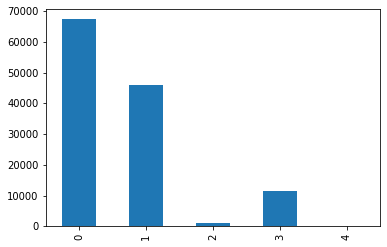

In [ ]:
x = DATA["classification."].value_counts().sort_index()
ax = x.plot(kind="bar")

sum =0
for i in x:
    sum += i    

for i,j in zip(dictionary_target,x):
    print(dictionary_target[i],i,j, str(round(100*j/sum,2))+"%")

<p align="justify">Let's continue manipulating our dataset now. Being a fairly large dataset (with many features), and being the computers used not excessively powerful, we need to reduce the dimensionality of our dataset as much as possible, trying to map the starting "scattered" representation into a "dense" representation.

<p align="justify">For this reason, we start by deleting all the rows or columns for which there is at least one null (N/A) value.

<p align="justify">Furthermore, the rows of the dataset have been randomly exchanged, this is because our training set will be determined by extracting the first 60,000 rows from the file.

<p align="justify"><i>N.B .: It should be noted that the differentiation of data_df into data_test_df and data_train_df is exclusively for educational purposes, to show how the division of data into train and test set should be carried out in the case of a single file, and with what proportions. The resulting variables will never be used. In our case, we have reduced the numbers both in absolute value and in proportion. Indeed:</i>

- 88181 -> 60000
- 37792 -> 6000

In [ ]:
DATA = DATA.dropna(axis = 0)
data_df= DATA.sample(frac= 1)
data_df=data_df.sample(frac=1)
data_df=data_df.sample(frac=1)
data_df=data_df.sample(frac=1)
data_test_df = data_df.sample(frac= 0.3)
data_train_df= data_df.drop(data_test_df.index)
print("Training set size: "+str(data_train_df.shape[0]))
print("Testing set size: "+str(data_test_df.shape[0]))

Training set size: 88181
Testing set size: 37792


<p align="justify">At this point, we proceed with our actual train set (which will then, in turn, be divided into train and validation set during the cross validation). As mentioned, <b>we therefore extract the first 60,000 records</b> starting from the previous representation, and create respectively the matrix X (of dimension 60,000 x 41) and the vector of the labels Y (of dimension 60,000 x 1).

<p align="justify">I assign these values ​​to two unique variables defined as X_train and Y_train.

<p align="justify">Furthermore, while previously, through the use of dictionaries, we had converted non-numeric values ​​into numeric values, we now try to standardize the values ​​of the various features, bringing them all back to a single scale (in this case, between -1 and 1).

<p align="justify">This is done through the "ss.fit_transform()" function.

<p align="justify">This is necessary because <b> we want to attribute a uniform weight to the various features </b> which, otherwise, would have had different contributions towards the prediction.


In [ ]:
X = data_df[:60000].drop("classification.", axis=1).values
Y = data_df[:60000]["classification."].values
        
X_train = X
Y_train = Y

ss = StandardScaler()
X_train = ss.fit_transform(X_train)

<p align="justify">Now let's continue the manipulation of our dataset, to try to make its representation as dense as possible (thus reducing its dimensionality as much as possible, without however losing too much in terms of information content).

<p align="justify">First of all, <b>we then carry out a compression of the represented values, passing from a 64bit format to one of 32</b>. This is because the size of the value is in any case between -1 and 1, so its length in bits is not relevant.

<p align="justify">Once this has been done, we can proceed with the real dimensionality reduction, through the <b>application of the PCA</b> (Principal Component Analysis). In this case, we wanted to reduce the dimensionality of our dataset to a number of principal components d that was able to express, in a cumulative manner, 90% of the total variance of the data.

<p align="justify">This was done through the use of the sklearn module called "PCA".

In [ ]:
X_train = X_train.astype('float32')

pca = PCA(0.90)
X_train = pca.fit_transform(X_train)
print(X_train.shape)

(60000, 20)


<p align="justify">We can easily see that the number of main components necessary to express the data, while keeping 90% of the truth intact, <b>is equal to 21.</b>

<p align="justify">However, it should be noted that these 21 main components are actually latent variables, and that they are not directly observable, nor attributable to any of the 41 starting features (we therefore only know that we managed to keep 90% of the information content of our data intact. , compared to a halving of their dimensionality).

<p align="justify">The new points, in the new space, will be mapped through the scalar product of the input vector (of dimension 60.000 * 41) and the transpose of the mapping matrix (of dimension 41 * 21).

<h3 align="center"> $Z = X*W^T$

<p align="justify">Note that the rows of the mapping matrix are in this case the eigenvectors corresponding to the 21 largest eigenvalues ​​in absolute value, collected on the covariance matrix of the features.


## <center><font color='orange'> **CHAPTER 5: CLASSICAL ML MODELS** </font></center>

<p align="justify">Here we can find the different models realized, which will be trained and compared. 


<h3 align ="center"> <font color = "orange">Support Vector Machine (SVM) and Kernel SVM</h3>

<p align="justify">A Support-Vector Machine constructs a hyperplane or set of <b>hyperplanes in a high- or infinite-dimensional space</b>, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

<p align="justify">Whereas the original problem may be stated in a finite-dimensional space, it often happens that the sets to discriminate are not linearly separable in that space. For this reason, it was proposed that the original finite-dimensional space be mapped into a much higher-dimensional space, presumably making the separation easier in that space. To keep the computational load reasonable, <b> the mappings used by SVM schemes are designed to ensure that dot products of pairs of input data vectors may be computed easily in terms of the variables in the original space</b>, by defining them in terms of a kernel function <i><b> K(x,y) </b></i> selected to suit the problem.

<p align="justify"> The hyperplanes in the higher-dimensional space are defined as the set of points whose dot product with a vector in that space is constant, where such a set of vectors is an orthogonal (and thus minimal) set of vectors that defines a hyperplane. The vectors defining the hyperplanes can be chosen to be linear combinations with parameters <i><b>alpha_{i} </b></i> of images of feature vectors <i><b> x_{i} </b></i> that occur in the data base.

<p align="justify"> Finally, we specify that in the application of the SVM kernel to our problem, we have seen the definition of four types of Kernel transformations: <b>linear (traditional SVM), polynomial, RBF (or Gaussian) and sigmoidal</b>.

------------- linear -------------



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,



Fold 1: 

Confusion matrix



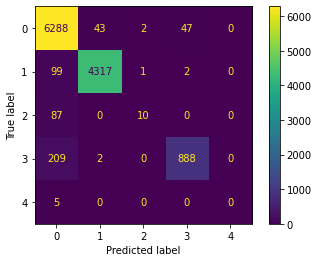



Class 0: precision=0.94019, recall=0.98558, f-measure=0.96235, true labels=6380
Class 1: precision=0.98968, recall=0.97692, f-measure=0.98326, true labels=4419
Class 2: precision=0.76923, recall=0.10309, f-measure=0.18182, true labels=97
Class 3: precision=0.94771, recall=0.80801, f-measure=0.87230, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.95858
Macro Precision = 0.72936
Macro Recall = 0.57472
Marco F-measure = 0.64287



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,



Fold 2: 

Confusion matrix



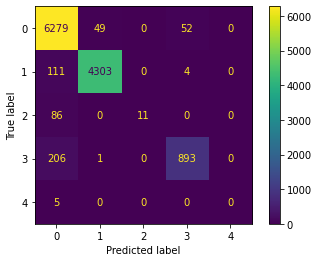



Class 0: precision=0.93899, recall=0.98417, f-measure=0.96105, true labels=6380
Class 1: precision=0.98851, recall=0.97397, f-measure=0.98119, true labels=4418
Class 2: precision=1.00000, recall=0.11340, f-measure=0.20370, true labels=97
Class 3: precision=0.94099, recall=0.81182, f-measure=0.87164, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.95717
Macro Precision = 0.7737
Macro Recall = 0.57667
Marco F-measure = 0.66081



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,



Fold 3: 

Confusion matrix



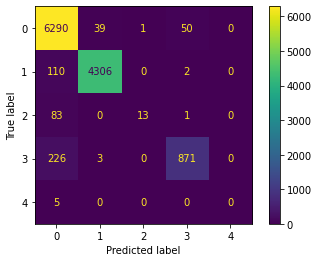



Class 0: precision=0.93685, recall=0.98589, f-measure=0.96075, true labels=6380
Class 1: precision=0.99034, recall=0.97465, f-measure=0.98243, true labels=4418
Class 2: precision=0.92857, recall=0.13402, f-measure=0.23423, true labels=97
Class 3: precision=0.94264, recall=0.79182, f-measure=0.86067, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.95667
Macro Precision = 0.75968
Macro Recall = 0.57728
Marco F-measure = 0.65604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,



Fold 4: 

Confusion matrix



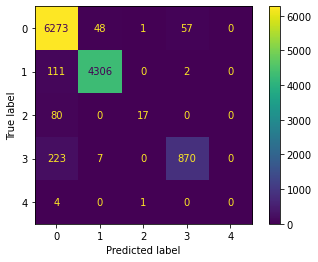



Class 0: precision=0.93753, recall=0.98338, f-measure=0.95991, true labels=6379
Class 1: precision=0.98739, recall=0.97443, f-measure=0.98087, true labels=4419
Class 2: precision=0.89474, recall=0.17526, f-measure=0.29310, true labels=97
Class 3: precision=0.93649, recall=0.79091, f-measure=0.85757, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.9555
Macro Precision = 0.75123
Macro Recall = 0.5848
Marco F-measure = 0.65765



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,



Fold 5: 

Confusion matrix



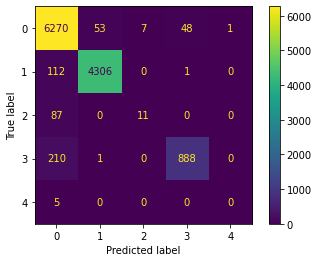



Class 0: precision=0.93806, recall=0.98291, f-measure=0.95996, true labels=6379
Class 1: precision=0.98761, recall=0.97443, f-measure=0.98098, true labels=4419
Class 2: precision=0.61111, recall=0.11224, f-measure=0.18966, true labels=98
Class 3: precision=0.94771, recall=0.80801, f-measure=0.87230, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.95625
Macro Precision = 0.6969
Macro Recall = 0.57552
Marco F-measure = 0.63042


linear Overall scores:
Accuracy = 0.95683
Precision = 0.74217
Recall = 0.57780
F-measure = 0.64956

run time: 110.15848398208618 s
------------- poly -------------


Fold 1: 

Confusion matrix



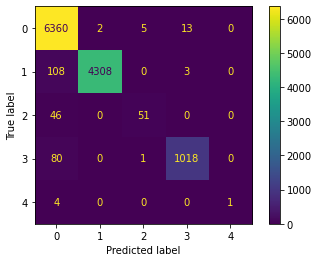



Class 0: precision=0.96393, recall=0.99687, f-measure=0.98012, true labels=6380
Class 1: precision=0.99954, recall=0.97488, f-measure=0.98705, true labels=4419
Class 2: precision=0.89474, recall=0.52577, f-measure=0.66234, true labels=97
Class 3: precision=0.98453, recall=0.92630, f-measure=0.95452, true labels=1099
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.97817
Macro Precision = 0.96855
Macro Recall = 0.72476
Marco F-measure = 0.82911


Fold 2: 

Confusion matrix



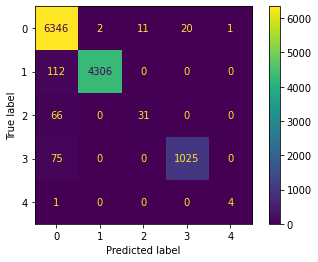



Class 0: precision=0.96152, recall=0.99467, f-measure=0.97781, true labels=6380
Class 1: precision=0.99954, recall=0.97465, f-measure=0.98694, true labels=4418
Class 2: precision=0.73810, recall=0.31959, f-measure=0.44604, true labels=97
Class 3: precision=0.98086, recall=0.93182, f-measure=0.95571, true labels=1100
Class 4: precision=0.80000, recall=0.80000, f-measure=0.80000, true labels=5

Accuracy = 0.976
Macro Precision = 0.896
Macro Recall = 0.80415
Marco F-measure = 0.84759


Fold 3: 

Confusion matrix



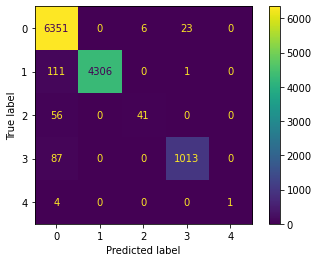



Class 0: precision=0.96096, recall=0.99545, f-measure=0.97790, true labels=6380
Class 1: precision=1.00000, recall=0.97465, f-measure=0.98716, true labels=4418
Class 2: precision=0.87234, recall=0.42268, f-measure=0.56944, true labels=97
Class 3: precision=0.97686, recall=0.92091, f-measure=0.94806, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.976
Macro Precision = 0.96203
Macro Recall = 0.70274
Marco F-measure = 0.81219


Fold 4: 

Confusion matrix



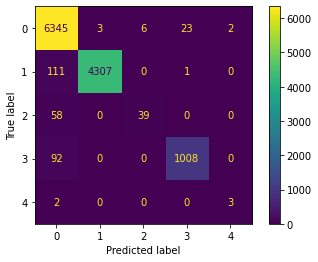



Class 0: precision=0.96020, recall=0.99467, f-measure=0.97713, true labels=6379
Class 1: precision=0.99930, recall=0.97465, f-measure=0.98683, true labels=4419
Class 2: precision=0.86667, recall=0.40206, f-measure=0.54930, true labels=97
Class 3: precision=0.97674, recall=0.91636, f-measure=0.94559, true labels=1100
Class 4: precision=0.60000, recall=0.60000, f-measure=0.60000, true labels=5

Accuracy = 0.97517
Macro Precision = 0.88058
Macro Recall = 0.77755
Marco F-measure = 0.82586


Fold 5: 

Confusion matrix



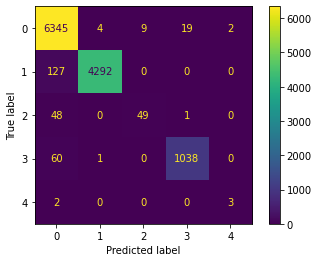



Class 0: precision=0.96399, recall=0.99467, f-measure=0.97909, true labels=6379
Class 1: precision=0.99884, recall=0.97126, f-measure=0.98486, true labels=4419
Class 2: precision=0.84483, recall=0.50000, f-measure=0.62821, true labels=98
Class 3: precision=0.98110, recall=0.94449, f-measure=0.96245, true labels=1099
Class 4: precision=0.60000, recall=0.60000, f-measure=0.60000, true labels=5

Accuracy = 0.97725
Macro Precision = 0.87775
Macro Recall = 0.80209
Marco F-measure = 0.83822


poly Overall scores:
Accuracy = 0.97652
Precision = 0.91698
Recall = 0.76226
F-measure = 0.83059

run time: 41.66230249404907 s
------------- rbf -------------


Fold 1: 

Confusion matrix



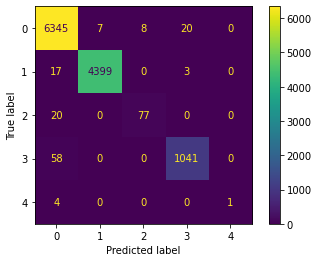



Class 0: precision=0.98464, recall=0.99451, f-measure=0.98955, true labels=6380
Class 1: precision=0.99841, recall=0.99547, f-measure=0.99694, true labels=4419
Class 2: precision=0.90588, recall=0.79381, f-measure=0.84615, true labels=97
Class 3: precision=0.97838, recall=0.94722, f-measure=0.96255, true labels=1099
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.98858
Macro Precision = 0.97346
Macro Recall = 0.78621
Marco F-measure = 0.86987


Fold 2: 

Confusion matrix



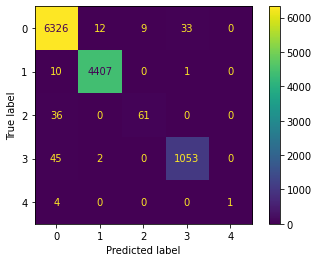



Class 0: precision=0.98520, recall=0.99154, f-measure=0.98836, true labels=6380
Class 1: precision=0.99683, recall=0.99751, f-measure=0.99717, true labels=4418
Class 2: precision=0.87143, recall=0.62887, f-measure=0.73054, true labels=97
Class 3: precision=0.96872, recall=0.95727, f-measure=0.96296, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.98733
Macro Precision = 0.96444
Macro Recall = 0.75504
Marco F-measure = 0.84699


Fold 3: 

Confusion matrix



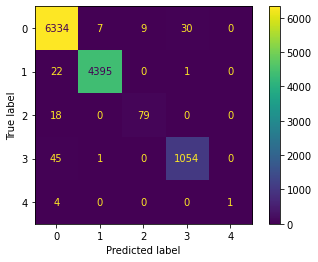



Class 0: precision=0.98614, recall=0.99279, f-measure=0.98946, true labels=6380
Class 1: precision=0.99818, recall=0.99479, f-measure=0.99649, true labels=4418
Class 2: precision=0.89773, recall=0.81443, f-measure=0.85405, true labels=97
Class 3: precision=0.97143, recall=0.95818, f-measure=0.96476, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.98858
Macro Precision = 0.9707
Macro Recall = 0.79204
Marco F-measure = 0.87232


Fold 4: 

Confusion matrix



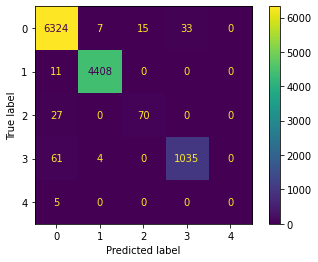



Class 0: precision=0.98382, recall=0.99138, f-measure=0.98758, true labels=6379
Class 1: precision=0.99751, recall=0.99751, f-measure=0.99751, true labels=4419
Class 2: precision=0.82353, recall=0.72165, f-measure=0.76923, true labels=97
Class 3: precision=0.96910, recall=0.94091, f-measure=0.95480, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98642
Macro Precision = 0.75479
Macro Recall = 0.73029
Marco F-measure = 0.74234



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 5: 

Confusion matrix



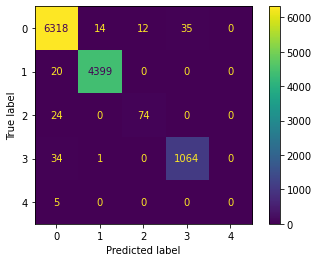



Class 0: precision=0.98703, recall=0.99044, f-measure=0.98873, true labels=6379
Class 1: precision=0.99660, recall=0.99547, f-measure=0.99604, true labels=4419
Class 2: precision=0.86047, recall=0.75510, f-measure=0.80435, true labels=98
Class 3: precision=0.96815, recall=0.96815, f-measure=0.96815, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98792
Macro Precision = 0.76245
Macro Recall = 0.74183
Marco F-measure = 0.752


rbf Overall scores:
Accuracy = 0.98777
Precision = 0.88517
Recall = 0.76108
F-measure = 0.81670

run time: 48.45291590690613 s
------------- sigmoid -------------



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 1: 

Confusion matrix



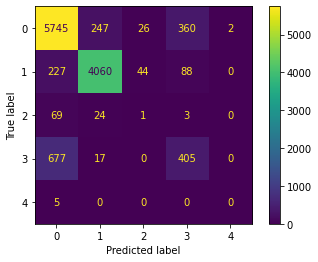



Class 0: precision=0.85453, recall=0.90047, f-measure=0.87690, true labels=6380
Class 1: precision=0.93376, recall=0.91876, f-measure=0.92620, true labels=4419
Class 2: precision=0.01408, recall=0.01031, f-measure=0.01190, true labels=97
Class 3: precision=0.47313, recall=0.36852, f-measure=0.41432, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.85092
Macro Precision = 0.4551
Macro Recall = 0.43961
Marco F-measure = 0.44722


Fold 2: 

Confusion matrix



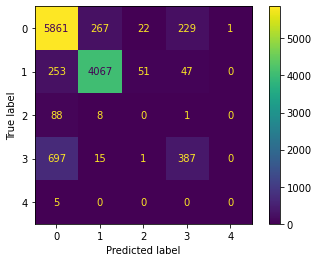



Class 0: precision=0.84893, recall=0.91865, f-measure=0.88241, true labels=6380
Class 1: precision=0.93344, recall=0.92055, f-measure=0.92695, true labels=4418
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=97
Class 3: precision=0.58283, recall=0.35182, f-measure=0.43878, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.85958
Macro Precision = 0.47304
Macro Recall = 0.4382
Marco F-measure = 0.45495


Fold 3: 

Confusion matrix



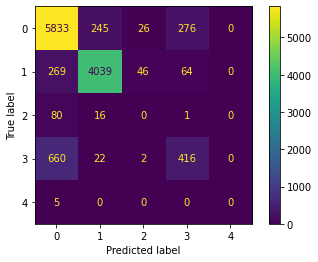



Class 0: precision=0.85191, recall=0.91426, f-measure=0.88198, true labels=6380
Class 1: precision=0.93452, recall=0.91421, f-measure=0.92426, true labels=4418
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=97
Class 3: precision=0.54954, recall=0.37818, f-measure=0.44803, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.85733
Macro Precision = 0.46719
Macro Recall = 0.44133
Marco F-measure = 0.45389



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4: 

Confusion matrix



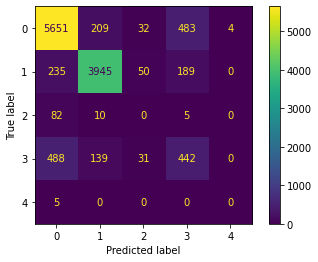



Class 0: precision=0.87463, recall=0.88588, f-measure=0.88022, true labels=6379
Class 1: precision=0.91680, recall=0.89274, f-measure=0.90461, true labels=4419
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=97
Class 3: precision=0.39500, recall=0.40182, f-measure=0.39838, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.8365
Macro Precision = 0.43729
Macro Recall = 0.43609
Marco F-measure = 0.43669


Fold 5: 

Confusion matrix



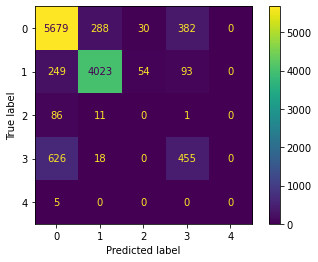



Class 0: precision=0.85463, recall=0.89026, f-measure=0.87208, true labels=6379
Class 1: precision=0.92696, recall=0.91039, f-measure=0.91860, true labels=4419
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=98
Class 3: precision=0.48872, recall=0.41401, f-measure=0.44828, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.84642
Macro Precision = 0.45406
Macro Recall = 0.44293
Marco F-measure = 0.44843


sigmoid Overall scores:
Accuracy = 0.85015
Precision = 0.45734
Recall = 0.43963
F-measure = 0.44824

run time: 164.33110523223877 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
list = ["linear", "poly", "rbf", "sigmoid"]                                     #Defining the possible kernel functions on which to base the SVM
for elem in list:                                                               #Let's evaluate them all, by iterating through them
    print("------------- "+elem +" -------------\n")
    start_time = time.time()                                                    #time inizializing, for runtime check
    svc = SVC(kernel=elem,max_iter=100000)                                      #Let's define our SVC and its max number of iterations
    scores, precisions, recalls, fmeasures = [],[],[],[]                        #Defining the lists that will contain the macro-values of every fold, so we can average them to obtain overall values
    kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)         #Initialize k-fold
    
    for k, (train, test) in enumerate(kfold.split(X_train, Y_train)):           #For every fold
        svc.fit(X_train[train], Y_train[train])                                 #Train the model by using train (4/5) and validation set (1/5) 
        validation_predictions = svc.predict(X_train[test])                     #Value prediction of the validation set's labels
        score=float("{:.5f}".format(accuracy_score(Y_train[test], validation_predictions))) #Accuracy evaluation
        print("\nFold " + str(k+1) +": \n")                                
        
        #the foloowing lines are meant to show the confusion matrix of the current fold, buìy comparing predicted labels and true ones                                   
        print("Confusion matrix"+"\n")
        cm=confusion_matrix(Y_train[test], validation_predictions, labels=svc.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
        disp.plot()
        plt.show() 
        print("\n")

        meas = precision_recall_fscore_support(Y_train[test], validation_predictions, average=None) #Define a way to compute precision, recall and f-measure
        precision, recall = [],[]                                                                   #Define the lists in which we'll append the values of each class, to compute macro values
        for i in range(len(svc.classes_)):
            #Let's see the values of every single class in the current fold
            print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))    
            precision.append(meas[0][i]) 
            recall.append(meas[1][i])
        
        macro_precision = float("{:.5f}".format(statistics.mean(precision)))    #Macro values computation
        macro_recall = float("{:.5f}".format(statistics.mean(recall)))
        macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
        scores.append(score)                                                    
        precision.clear()                                                       #We now clear the lists, so they don't store values from previous folds
        recall.clear()
        #We now display the performance of the current fold
        print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
        
        precisions.append(macro_precision)                                      #We append the macro values to the "overall" performance list
        recalls.append(macro_recall)
        fmeasures.append(macro_fmeasure)

    print("\n" + elem +" Overall scores:")
    print("Accuracy = {:.5f}".format(np.array(scores).mean()))                  #We then display the overall scores by averaging through the list
    print("Precision = {:.5f}".format(np.array(precisions).mean()))
    print("Recall = {:.5f}".format(np.array(recalls).mean()))
    print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
    print("run time: " +str(time.time()-start_time) + " s")                     #We then display the runtime, so we can compare models

<h3 align ="center"> <font color = "orange"> Linear and polynomial logistic regession </h3>

<p align="justify">The Logistic Regressor is a model that approximates the point cloud defined by the dataset through a polynomial linear combinations of the feature of the data which, in the specific case, is first and second degree.

<p align="justify">The name of the model is given by th activation function of the polynomial linear combination, <b>that is the logistic function, that gives for each number an associated value between 0 and 1</b>, which allows to classify the point by comparing that logistic value with a defined threshold (e.g. 0,5).

<p align="justify">More precisely, in this code the for loop associated with the PolynomialFeatures function (degree = i), imported from the PolynomialFeatures sklearn module, is used to raise the degree of the regression model in the range (1,3), therefore, from the first to the second degree.

<p align="justify">By applying the log regression to this model of higher degree than the first, the regression model on which the prediction program will be set will also be of higher degree than the first.

----------- Grade: 1 -------------

Fold 1: 

Confusion matrix



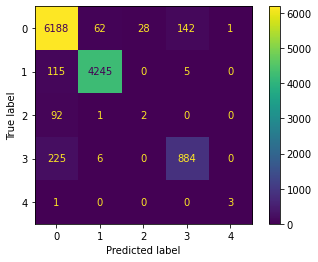



Class 0: precision=0.93460, recall=0.96371, f-measure=0.94893, true labels=6421
Class 1: precision=0.98401, recall=0.97251, f-measure=0.97822, true labels=4365
Class 2: precision=0.06667, recall=0.02105, f-measure=0.03200, true labels=95
Class 3: precision=0.85742, recall=0.79283, f-measure=0.82386, true labels=1115
Class 4: precision=0.75000, recall=0.75000, f-measure=0.75000, true labels=4

Accuracy = 0.9435
Macro Precision = 0.71854
Macro Recall = 0.70002
Marco F-measure = 0.70916


Fold 2: 

Confusion matrix



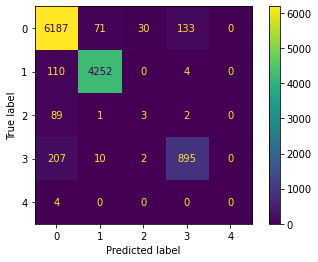



Class 0: precision=0.93785, recall=0.96356, f-measure=0.95053, true labels=6421
Class 1: precision=0.98108, recall=0.97389, f-measure=0.97747, true labels=4366
Class 2: precision=0.08571, recall=0.03158, f-measure=0.04615, true labels=95
Class 3: precision=0.86557, recall=0.80341, f-measure=0.83333, true labels=1114
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=4

Accuracy = 0.94475
Macro Precision = 0.57404
Macro Recall = 0.55449
Marco F-measure = 0.5641



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 3: 

Confusion matrix



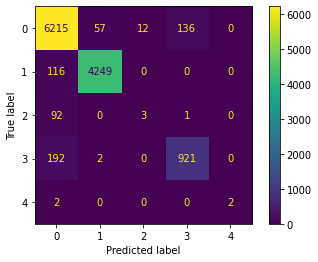



Class 0: precision=0.93925, recall=0.96807, f-measure=0.95344, true labels=6420
Class 1: precision=0.98630, recall=0.97342, f-measure=0.97982, true labels=4365
Class 2: precision=0.20000, recall=0.03125, f-measure=0.05405, true labels=96
Class 3: precision=0.87051, recall=0.82601, f-measure=0.84768, true labels=1115
Class 4: precision=1.00000, recall=0.50000, f-measure=0.66667, true labels=4

Accuracy = 0.94917
Macro Precision = 0.79921
Macro Recall = 0.65975
Marco F-measure = 0.72281


Fold 4: 

Confusion matrix



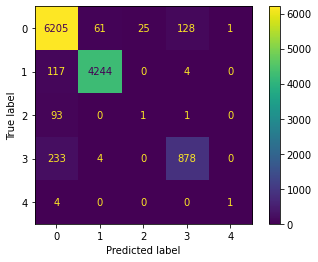



Class 0: precision=0.93280, recall=0.96651, f-measure=0.94936, true labels=6420
Class 1: precision=0.98492, recall=0.97228, f-measure=0.97856, true labels=4365
Class 2: precision=0.03846, recall=0.01053, f-measure=0.01653, true labels=95
Class 3: precision=0.86845, recall=0.78744, f-measure=0.82596, true labels=1115
Class 4: precision=0.50000, recall=0.20000, f-measure=0.28571, true labels=5

Accuracy = 0.94408
Macro Precision = 0.66493
Macro Recall = 0.58735
Marco F-measure = 0.62374


Fold 5: 

Confusion matrix



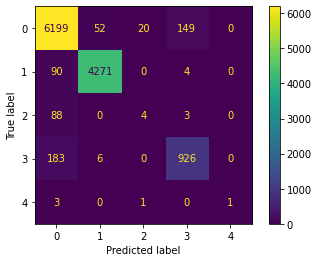



Class 0: precision=0.94454, recall=0.96558, f-measure=0.95494, true labels=6420
Class 1: precision=0.98660, recall=0.97847, f-measure=0.98252, true labels=4365
Class 2: precision=0.16000, recall=0.04211, f-measure=0.06667, true labels=95
Class 3: precision=0.85582, recall=0.83049, f-measure=0.84297, true labels=1115
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.95008
Macro Precision = 0.78939
Macro Recall = 0.60333
Marco F-measure = 0.68393


Overall scores:
Accuracy = 0.94632
Precision = 0.70922
Recall = 0.62099
F-measure = 0.66075

run time:124.93428301811218 s
----------- Grade: 2 -------------

Fold 1: 

Confusion matrix



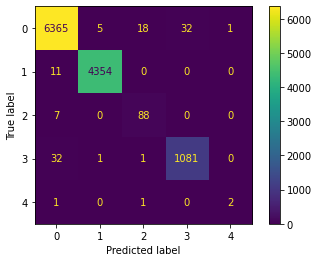



Class 0: precision=0.99205, recall=0.99128, f-measure=0.99166, true labels=6421
Class 1: precision=0.99862, recall=0.99748, f-measure=0.99805, true labels=4365
Class 2: precision=0.81481, recall=0.92632, f-measure=0.86700, true labels=95
Class 3: precision=0.97125, recall=0.96951, f-measure=0.97038, true labels=1115
Class 4: precision=0.66667, recall=0.50000, f-measure=0.57143, true labels=4

Accuracy = 0.99083
Macro Precision = 0.88868
Macro Recall = 0.87692
Marco F-measure = 0.88276


Fold 2: 

Confusion matrix



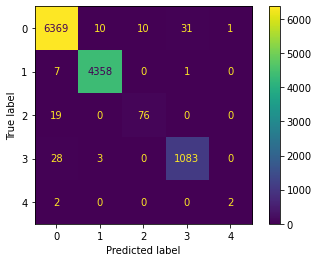



Class 0: precision=0.99128, recall=0.99190, f-measure=0.99159, true labels=6421
Class 1: precision=0.99703, recall=0.99817, f-measure=0.99760, true labels=4366
Class 2: precision=0.88372, recall=0.80000, f-measure=0.83978, true labels=95
Class 3: precision=0.97130, recall=0.97217, f-measure=0.97174, true labels=1114
Class 4: precision=0.66667, recall=0.50000, f-measure=0.57143, true labels=4

Accuracy = 0.99067
Macro Precision = 0.902
Macro Recall = 0.85245
Marco F-measure = 0.87653


Fold 3: 

Confusion matrix



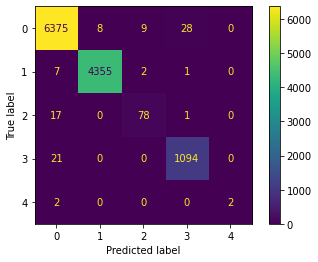



Class 0: precision=0.99268, recall=0.99299, f-measure=0.99284, true labels=6420
Class 1: precision=0.99817, recall=0.99771, f-measure=0.99794, true labels=4365
Class 2: precision=0.87640, recall=0.81250, f-measure=0.84324, true labels=96
Class 3: precision=0.97331, recall=0.98117, f-measure=0.97722, true labels=1115
Class 4: precision=1.00000, recall=0.50000, f-measure=0.66667, true labels=4

Accuracy = 0.992
Macro Precision = 0.96811
Macro Recall = 0.85687
Marco F-measure = 0.9091


Fold 4: 

Confusion matrix



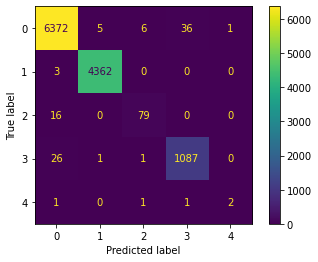



Class 0: precision=0.99283, recall=0.99252, f-measure=0.99268, true labels=6420
Class 1: precision=0.99863, recall=0.99931, f-measure=0.99897, true labels=4365
Class 2: precision=0.90805, recall=0.83158, f-measure=0.86813, true labels=95
Class 3: precision=0.96708, recall=0.97489, f-measure=0.97097, true labels=1115
Class 4: precision=0.66667, recall=0.40000, f-measure=0.50000, true labels=5

Accuracy = 0.99183
Macro Precision = 0.90665
Macro Recall = 0.83966
Marco F-measure = 0.87187



In [ ]:
for i in range(1,3):                                                        #we iterate through a linear logistic regression and a grade 2 one
    start_time = time.time()
    lr = LogisticRegression(solver='lbfgs', max_iter= 100000000000)
    kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)         
    scores, precisions, recalls, fmeasures = [],[],[],[]

    polyfeats = PolynomialFeatures(degree=i)                                #Transform the input arrays to the regression model into i-th degree arrays
    X_train_poly = polyfeats.fit_transform(X_train)
    print("----------- Grade: "+str(i) +" -------------")

    for k, (train, test) in enumerate(kfold.split(X_train_poly, Y_train)):
        lr.fit(X_train_poly[train], Y_train[train])                             
        validation_predictions = lr.predict(X_train_poly[test])
        score=float("{:.5f}".format(accuracy_score(Y_train[test], validation_predictions)))     
        print("\nFold " + str(k+1) +": \n")  

        print("Confusion matrix"+"\n")
        cm=confusion_matrix(Y_train[test], validation_predictions, labels=lr.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
        disp.plot()
        plt.show() 
        print("\n")
        
        meas = precision_recall_fscore_support(Y_train[test], validation_predictions, average=None)
        precision, recall = [],[]
        for i in range(len(lr.classes_)):
            print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
            precision.append(meas[0][i]) 
            recall.append(meas[1][i])

        macro_precision = float("{:.5f}".format(statistics.mean(precision)))    
        macro_recall = float("{:.5f}".format(statistics.mean(recall)))
        macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
        scores.append(score)
        precision.clear()
        recall.clear()
        print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
       
        precisions.append(macro_precision)                                      
        recalls.append(macro_recall)
        fmeasures.append(macro_fmeasure)

    print("\nOverall scores:")
    print("Accuracy = {:.5f}".format(np.array(scores).mean()))                  
    print("Precision = {:.5f}".format(np.array(precisions).mean()))
    print("Recall = {:.5f}".format(np.array(recalls).mean()))
    print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
    print("run time:" +str(time.time()-start_time) + " s")

<h3 align ="center"> <font color = "orange">One vs All </h3>



<p align="justify">The One Vs All algorithm iteratively applies a classification algorithm for dichotomous classes: at each step, for each observation, a class is compared with all the others (which result, for that iteration, to be all a single class), through a given classification algorithm. 

<p align="justify">Specifically, in our program, we used the Logistic Regressor iteratively.
This means that, at each iteration, the class that had a higher probability than the others was the one designated to contain the observation object of the prediction.

<p align="justify">Due to the fact that Python automatically applies One vs All to all classifiers for dichotomous tasks, when it recognizes more classes, <b>the result of this algorithm is similar to that of the linear regressor previously reported</b>.

One vs All


Fold 1: 

Confusion matrix



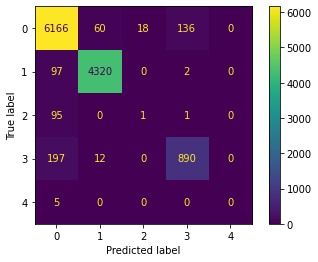



Class 0: precision=0.93994, recall=0.96646, f-measure=0.95301, true labels=6380
Class 1: precision=0.98361, recall=0.97760, f-measure=0.98059, true labels=4419
Class 2: precision=0.05263, recall=0.01031, f-measure=0.01724, true labels=97
Class 3: precision=0.86492, recall=0.80983, f-measure=0.83647, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.94808
Macro Precision = 0.56822
Macro Recall = 0.55284
Marco F-measure = 0.56042



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



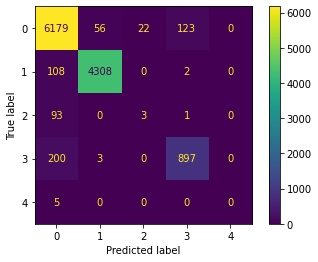



Class 0: precision=0.93834, recall=0.96850, f-measure=0.95318, true labels=6380
Class 1: precision=0.98649, recall=0.97510, f-measure=0.98076, true labels=4418
Class 2: precision=0.12000, recall=0.03093, f-measure=0.04918, true labels=97
Class 3: precision=0.87683, recall=0.81545, f-measure=0.84503, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.94892
Macro Precision = 0.58433
Macro Recall = 0.558
Marco F-measure = 0.57086



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 3: 

Confusion matrix



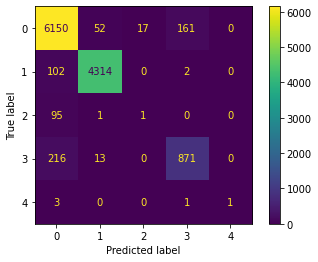



Class 0: precision=0.93664, recall=0.96395, f-measure=0.95010, true labels=6380
Class 1: precision=0.98493, recall=0.97646, f-measure=0.98068, true labels=4418
Class 2: precision=0.05556, recall=0.01031, f-measure=0.01739, true labels=97
Class 3: precision=0.84155, recall=0.79182, f-measure=0.81593, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.94475
Macro Precision = 0.76374
Macro Recall = 0.58851
Marco F-measure = 0.66477


Fold 4: 

Confusion matrix



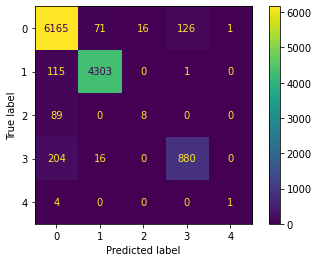



Class 0: precision=0.93736, recall=0.96645, f-measure=0.95168, true labels=6379
Class 1: precision=0.98018, recall=0.97375, f-measure=0.97696, true labels=4419
Class 2: precision=0.33333, recall=0.08247, f-measure=0.13223, true labels=97
Class 3: precision=0.87388, recall=0.80000, f-measure=0.83531, true labels=1100
Class 4: precision=0.50000, recall=0.20000, f-measure=0.28571, true labels=5

Accuracy = 0.94642
Macro Precision = 0.72495
Macro Recall = 0.60454
Marco F-measure = 0.65929


Fold 5: 

Confusion matrix



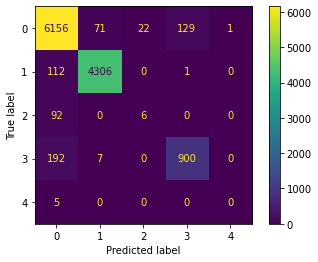



Class 0: precision=0.93884, recall=0.96504, f-measure=0.95176, true labels=6379
Class 1: precision=0.98221, recall=0.97443, f-measure=0.97830, true labels=4419
Class 2: precision=0.21429, recall=0.06122, f-measure=0.09524, true labels=98
Class 3: precision=0.87379, recall=0.81893, f-measure=0.84547, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.94733
Macro Precision = 0.60182
Macro Recall = 0.56392
Marco F-measure = 0.58225


Overall scores:
Accuracy = 0.94710
Precision = 0.64861
Recall = 0.57356
F-measure = 0.60752

run time:30.992483615875244 s


In [ ]:
start_time = time.time()
ovr = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter= 1000000)) 

kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)             
scores, precisions, recalls, fmeasures = [],[],[],[]
print("One vs All\n")
 
for k, (train, test) in enumerate(kfold.split(X_train, Y_train)):
    ovr.fit(X_train[train], Y_train[train])                                     
    validation_predictions = ovr.predict(X_train[test])
    score=float("{:.5f}".format(accuracy_score(Y_train[test], validation_predictions))) 
    print("\nFold " + str(k+1) +": \n")   
                                  
    print("Confusion matrix"+"\n")
    cm=confusion_matrix(Y_train[test], validation_predictions, labels=ovr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ovr.classes_)
    disp.plot()
    plt.show() 
    print("\n")

    meas = precision_recall_fscore_support(Y_train[test], validation_predictions, average=None)
    precision, recall = [],[]
    for i in range(len(ovr.classes_)):
        print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
        precision.append(meas[0][i]) 
        recall.append(meas[1][i])
        
    macro_precision = float("{:.5f}".format(statistics.mean(precision)))        
    macro_recall = float("{:.5f}".format(statistics.mean(recall)))
    macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
    scores.append(score)
    precision.clear()
    recall.clear()
    print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
    
    precisions.append(macro_precision)                                          
    recalls.append(macro_recall)
    fmeasures.append(macro_fmeasure)

print("\nOverall scores:")
print("Accuracy = {:.5f}".format(np.array(scores).mean()))                      
print("Precision = {:.5f}".format(np.array(precisions).mean()))
print("Recall = {:.5f}".format(np.array(recalls).mean()))
print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
print("run time:" +str(time.time()-start_time) + " s")

<h3 align ="center"> <font color = "orange">K-nearest neighbours </h3>



<p align="justify">the KNN algorithm is used in the recognition of patterns for the classification of objects based on the characteristics of the objects closer to the one considered.

<p align="justify">In both cases, the input is the closest K training examples in the feature space (after PCA application). The output depends on using k-NN for classification or regression; in this case the classification knn was used.

<p align="justify">The for loop scrolls the values ​​of k for all those defined in the list Ks: <b> in this model the program that applies the knn algorithm returns predictions associated, gradually, to a greater quantity of sieved neighbors</b>.

----------- Ks: 1 -------------

Fold 1: 

Confusion matrix



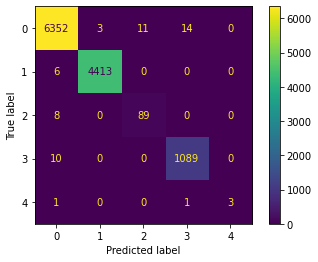



Class 0: precision=0.99608, recall=0.99561, f-measure=0.99585, true labels=6380
Class 1: precision=0.99932, recall=0.99864, f-measure=0.99898, true labels=4419
Class 2: precision=0.89000, recall=0.91753, f-measure=0.90355, true labels=97
Class 3: precision=0.98641, recall=0.99090, f-measure=0.98865, true labels=1099
Class 4: precision=1.00000, recall=0.60000, f-measure=0.75000, true labels=5

Accuracy = 0.9955
Macro Precision = 0.97436
Macro Recall = 0.90054
Marco F-measure = 0.936


Fold 2: 

Confusion matrix



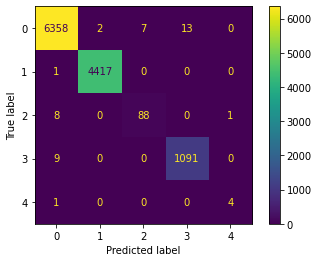



Class 0: precision=0.99702, recall=0.99655, f-measure=0.99679, true labels=6380
Class 1: precision=0.99955, recall=0.99977, f-measure=0.99966, true labels=4418
Class 2: precision=0.92632, recall=0.90722, f-measure=0.91667, true labels=97
Class 3: precision=0.98822, recall=0.99182, f-measure=0.99002, true labels=1100
Class 4: precision=0.80000, recall=0.80000, f-measure=0.80000, true labels=5

Accuracy = 0.9965
Macro Precision = 0.94222
Macro Recall = 0.93907
Marco F-measure = 0.94064


Fold 3: 

Confusion matrix



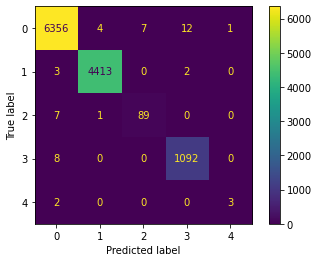



Class 0: precision=0.99686, recall=0.99624, f-measure=0.99655, true labels=6380
Class 1: precision=0.99887, recall=0.99887, f-measure=0.99887, true labels=4418
Class 2: precision=0.92708, recall=0.91753, f-measure=0.92228, true labels=97
Class 3: precision=0.98734, recall=0.99273, f-measure=0.99003, true labels=1100
Class 4: precision=0.75000, recall=0.60000, f-measure=0.66667, true labels=5

Accuracy = 0.99608
Macro Precision = 0.93203
Macro Recall = 0.90107
Marco F-measure = 0.91629


Fold 4: 

Confusion matrix



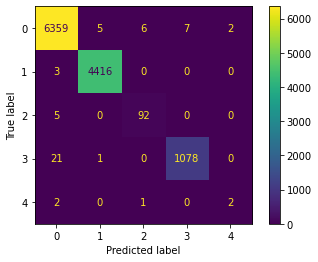



Class 0: precision=0.99515, recall=0.99686, f-measure=0.99601, true labels=6379
Class 1: precision=0.99864, recall=0.99932, f-measure=0.99898, true labels=4419
Class 2: precision=0.92929, recall=0.94845, f-measure=0.93878, true labels=97
Class 3: precision=0.99355, recall=0.98000, f-measure=0.98673, true labels=1100
Class 4: precision=0.50000, recall=0.40000, f-measure=0.44444, true labels=5

Accuracy = 0.99558
Macro Precision = 0.88333
Macro Recall = 0.86493
Marco F-measure = 0.87403


Fold 5: 

Confusion matrix



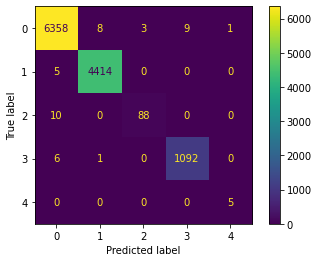



Class 0: precision=0.99671, recall=0.99671, f-measure=0.99671, true labels=6379
Class 1: precision=0.99797, recall=0.99887, f-measure=0.99842, true labels=4419
Class 2: precision=0.96703, recall=0.89796, f-measure=0.93122, true labels=98
Class 3: precision=0.99183, recall=0.99363, f-measure=0.99273, true labels=1099
Class 4: precision=0.83333, recall=1.00000, f-measure=0.90909, true labels=5

Accuracy = 0.99642
Macro Precision = 0.95737
Macro Recall = 0.97743
Marco F-measure = 0.9673


Ks: 1
Overall scores:
Accuracy = 0.99602
Precision = 0.93786
Recall = 0.91661
F-measure = 0.92685

run time:39.99335718154907 s
----------- Ks: 2 -------------

Fold 1: 

Confusion matrix



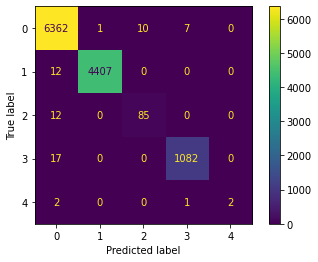



Class 0: precision=0.99329, recall=0.99718, f-measure=0.99523, true labels=6380
Class 1: precision=0.99977, recall=0.99728, f-measure=0.99853, true labels=4419
Class 2: precision=0.89474, recall=0.87629, f-measure=0.88542, true labels=97
Class 3: precision=0.99266, recall=0.98453, f-measure=0.98858, true labels=1099
Class 4: precision=1.00000, recall=0.40000, f-measure=0.57143, true labels=5

Accuracy = 0.99483
Macro Precision = 0.97609
Macro Recall = 0.85106
Marco F-measure = 0.9093


Fold 2: 

Confusion matrix



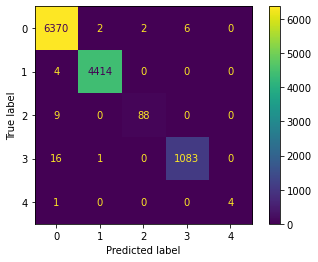



Class 0: precision=0.99531, recall=0.99843, f-measure=0.99687, true labels=6380
Class 1: precision=0.99932, recall=0.99909, f-measure=0.99921, true labels=4418
Class 2: precision=0.97778, recall=0.90722, f-measure=0.94118, true labels=97
Class 3: precision=0.99449, recall=0.98455, f-measure=0.98949, true labels=1100
Class 4: precision=1.00000, recall=0.80000, f-measure=0.88889, true labels=5

Accuracy = 0.99658
Macro Precision = 0.99338
Macro Recall = 0.93786
Marco F-measure = 0.96482


Fold 3: 

Confusion matrix



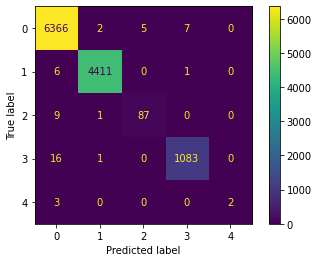



Class 0: precision=0.99469, recall=0.99781, f-measure=0.99624, true labels=6380
Class 1: precision=0.99909, recall=0.99842, f-measure=0.99875, true labels=4418
Class 2: precision=0.94565, recall=0.89691, f-measure=0.92063, true labels=97
Class 3: precision=0.99267, recall=0.98455, f-measure=0.98859, true labels=1100
Class 4: precision=1.00000, recall=0.40000, f-measure=0.57143, true labels=5

Accuracy = 0.99575
Macro Precision = 0.98642
Macro Recall = 0.85553
Marco F-measure = 0.91632


Fold 4: 

Confusion matrix



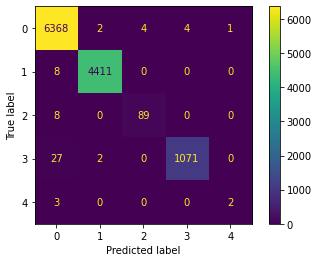



Class 0: precision=0.99283, recall=0.99828, f-measure=0.99554, true labels=6379
Class 1: precision=0.99909, recall=0.99819, f-measure=0.99864, true labels=4419
Class 2: precision=0.95699, recall=0.91753, f-measure=0.93684, true labels=97
Class 3: precision=0.99628, recall=0.97364, f-measure=0.98483, true labels=1100
Class 4: precision=0.66667, recall=0.40000, f-measure=0.50000, true labels=5

Accuracy = 0.99508
Macro Precision = 0.92237
Macro Recall = 0.85753
Marco F-measure = 0.88877


Fold 5: 

Confusion matrix



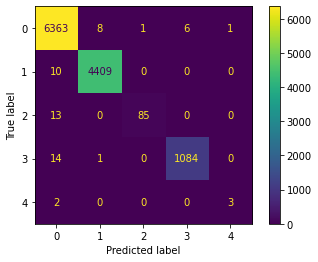



Class 0: precision=0.99391, recall=0.99749, f-measure=0.99570, true labels=6379
Class 1: precision=0.99796, recall=0.99774, f-measure=0.99785, true labels=4419
Class 2: precision=0.98837, recall=0.86735, f-measure=0.92391, true labels=98
Class 3: precision=0.99450, recall=0.98635, f-measure=0.99041, true labels=1099
Class 4: precision=0.75000, recall=0.60000, f-measure=0.66667, true labels=5

Accuracy = 0.99533
Macro Precision = 0.94495
Macro Recall = 0.88979
Marco F-measure = 0.91654


Ks: 2
Overall scores:
Accuracy = 0.99551
Precision = 0.96464
Recall = 0.87835
F-measure = 0.91915

run time:48.19668650627136 s
----------- Ks: 3 -------------

Fold 1: 

Confusion matrix



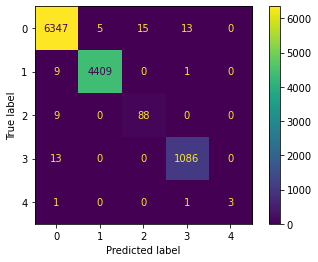



Class 0: precision=0.99498, recall=0.99483, f-measure=0.99491, true labels=6380
Class 1: precision=0.99887, recall=0.99774, f-measure=0.99830, true labels=4419
Class 2: precision=0.85437, recall=0.90722, f-measure=0.88000, true labels=97
Class 3: precision=0.98638, recall=0.98817, f-measure=0.98727, true labels=1099
Class 4: precision=1.00000, recall=0.60000, f-measure=0.75000, true labels=5

Accuracy = 0.99442
Macro Precision = 0.96692
Macro Recall = 0.89759
Marco F-measure = 0.93097


Fold 2: 

Confusion matrix



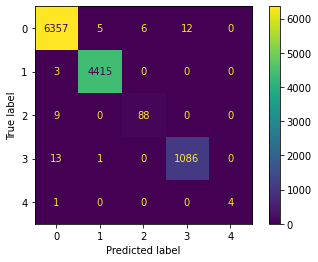



Class 0: precision=0.99593, recall=0.99639, f-measure=0.99616, true labels=6380
Class 1: precision=0.99864, recall=0.99932, f-measure=0.99898, true labels=4418
Class 2: precision=0.93617, recall=0.90722, f-measure=0.92147, true labels=97
Class 3: precision=0.98907, recall=0.98727, f-measure=0.98817, true labels=1100
Class 4: precision=1.00000, recall=0.80000, f-measure=0.88889, true labels=5

Accuracy = 0.99583
Macro Precision = 0.98396
Macro Recall = 0.93804
Marco F-measure = 0.96045


Fold 3: 

Confusion matrix



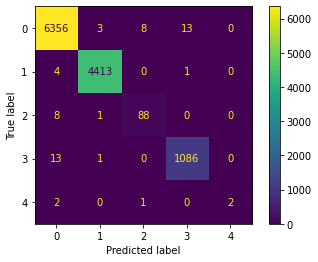



Class 0: precision=0.99577, recall=0.99624, f-measure=0.99600, true labels=6380
Class 1: precision=0.99887, recall=0.99887, f-measure=0.99887, true labels=4418
Class 2: precision=0.90722, recall=0.90722, f-measure=0.90722, true labels=97
Class 3: precision=0.98727, recall=0.98727, f-measure=0.98727, true labels=1100
Class 4: precision=1.00000, recall=0.40000, f-measure=0.57143, true labels=5

Accuracy = 0.99542
Macro Precision = 0.97783
Macro Recall = 0.85792
Marco F-measure = 0.91396


Fold 4: 

Confusion matrix



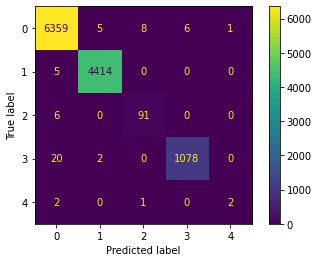



Class 0: precision=0.99484, recall=0.99686, f-measure=0.99585, true labels=6379
Class 1: precision=0.99842, recall=0.99887, f-measure=0.99864, true labels=4419
Class 2: precision=0.91000, recall=0.93814, f-measure=0.92386, true labels=97
Class 3: precision=0.99446, recall=0.98000, f-measure=0.98718, true labels=1100
Class 4: precision=0.66667, recall=0.40000, f-measure=0.50000, true labels=5

Accuracy = 0.99533
Macro Precision = 0.91288
Macro Recall = 0.86278
Marco F-measure = 0.88712


Fold 5: 

Confusion matrix



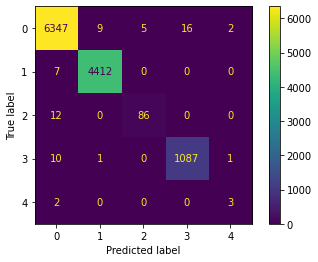



Class 0: precision=0.99514, recall=0.99498, f-measure=0.99506, true labels=6379
Class 1: precision=0.99774, recall=0.99842, f-measure=0.99808, true labels=4419
Class 2: precision=0.94505, recall=0.87755, f-measure=0.91005, true labels=98
Class 3: precision=0.98549, recall=0.98908, f-measure=0.98728, true labels=1099
Class 4: precision=0.50000, recall=0.60000, f-measure=0.54545, true labels=5

Accuracy = 0.99458
Macro Precision = 0.88469
Macro Recall = 0.89201
Marco F-measure = 0.88833


Ks: 3
Overall scores:
Accuracy = 0.99512
Precision = 0.94526
Recall = 0.88967
F-measure = 0.91617

run time:44.97374176979065 s
----------- Ks: 4 -------------

Fold 1: 

Confusion matrix



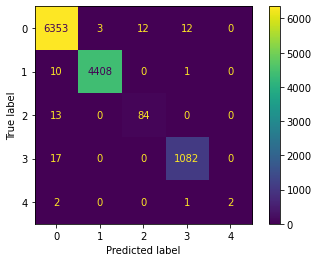



Class 0: precision=0.99343, recall=0.99577, f-measure=0.99460, true labels=6380
Class 1: precision=0.99932, recall=0.99751, f-measure=0.99841, true labels=4419
Class 2: precision=0.87500, recall=0.86598, f-measure=0.87047, true labels=97
Class 3: precision=0.98723, recall=0.98453, f-measure=0.98588, true labels=1099
Class 4: precision=1.00000, recall=0.40000, f-measure=0.57143, true labels=5

Accuracy = 0.99408
Macro Precision = 0.971
Macro Recall = 0.84876
Marco F-measure = 0.90577


Fold 2: 

Confusion matrix



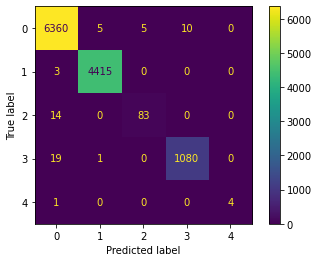



Class 0: precision=0.99422, recall=0.99687, f-measure=0.99554, true labels=6380
Class 1: precision=0.99864, recall=0.99932, f-measure=0.99898, true labels=4418
Class 2: precision=0.94318, recall=0.85567, f-measure=0.89730, true labels=97
Class 3: precision=0.99083, recall=0.98182, f-measure=0.98630, true labels=1100
Class 4: precision=1.00000, recall=0.80000, f-measure=0.88889, true labels=5

Accuracy = 0.99517
Macro Precision = 0.98537
Macro Recall = 0.92673
Marco F-measure = 0.95515


Fold 3: 

Confusion matrix



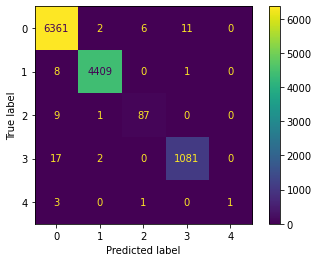



Class 0: precision=0.99422, recall=0.99702, f-measure=0.99562, true labels=6380
Class 1: precision=0.99887, recall=0.99796, f-measure=0.99841, true labels=4418
Class 2: precision=0.92553, recall=0.89691, f-measure=0.91099, true labels=97
Class 3: precision=0.98902, recall=0.98273, f-measure=0.98586, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.99492
Macro Precision = 0.98153
Macro Recall = 0.81492
Marco F-measure = 0.8905


Fold 4: 

Confusion matrix



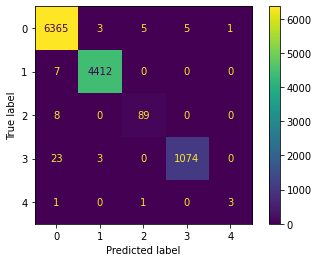



Class 0: precision=0.99391, recall=0.99781, f-measure=0.99585, true labels=6379
Class 1: precision=0.99864, recall=0.99842, f-measure=0.99853, true labels=4419
Class 2: precision=0.93684, recall=0.91753, f-measure=0.92708, true labels=97
Class 3: precision=0.99537, recall=0.97636, f-measure=0.98577, true labels=1100
Class 4: precision=0.75000, recall=0.60000, f-measure=0.66667, true labels=5

Accuracy = 0.99525
Macro Precision = 0.93495
Macro Recall = 0.89802
Marco F-measure = 0.91611


Fold 5: 

Confusion matrix



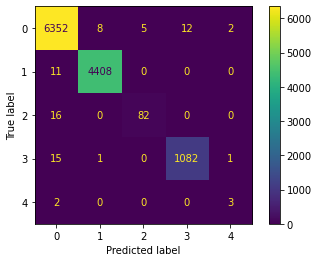



Class 0: precision=0.99312, recall=0.99577, f-measure=0.99444, true labels=6379
Class 1: precision=0.99796, recall=0.99751, f-measure=0.99774, true labels=4419
Class 2: precision=0.94253, recall=0.83673, f-measure=0.88649, true labels=98
Class 3: precision=0.98903, recall=0.98453, f-measure=0.98678, true labels=1099
Class 4: precision=0.50000, recall=0.60000, f-measure=0.54545, true labels=5

Accuracy = 0.99392
Macro Precision = 0.88453
Macro Recall = 0.88291
Marco F-measure = 0.88372


Ks: 4
Overall scores:
Accuracy = 0.99467
Precision = 0.95148
Recall = 0.87427
F-measure = 0.91025

run time:58.93992280960083 s
----------- Ks: 5 -------------

Fold 1: 

Confusion matrix



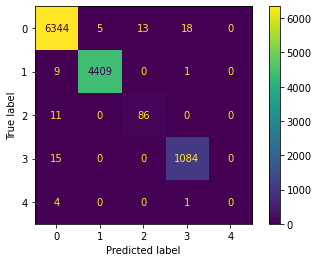



Class 0: precision=0.99389, recall=0.99436, f-measure=0.99412, true labels=6380
Class 1: precision=0.99887, recall=0.99774, f-measure=0.99830, true labels=4419
Class 2: precision=0.86869, recall=0.88660, f-measure=0.87755, true labels=97
Class 3: precision=0.98188, recall=0.98635, f-measure=0.98411, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99358
Macro Precision = 0.76867
Macro Recall = 0.77301
Marco F-measure = 0.77083



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



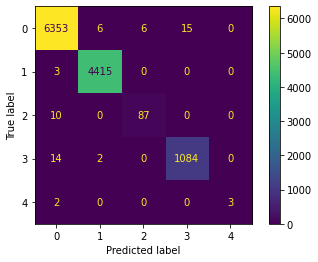



Class 0: precision=0.99546, recall=0.99577, f-measure=0.99561, true labels=6380
Class 1: precision=0.99819, recall=0.99932, f-measure=0.99876, true labels=4418
Class 2: precision=0.93548, recall=0.89691, f-measure=0.91579, true labels=97
Class 3: precision=0.98635, recall=0.98545, f-measure=0.98590, true labels=1100
Class 4: precision=1.00000, recall=0.60000, f-measure=0.75000, true labels=5

Accuracy = 0.99517
Macro Precision = 0.9831
Macro Recall = 0.89549
Marco F-measure = 0.93725


Fold 3: 

Confusion matrix



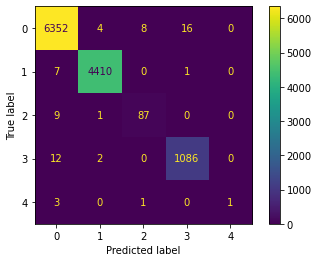



Class 0: precision=0.99514, recall=0.99561, f-measure=0.99538, true labels=6380
Class 1: precision=0.99842, recall=0.99819, f-measure=0.99830, true labels=4418
Class 2: precision=0.90625, recall=0.89691, f-measure=0.90155, true labels=97
Class 3: precision=0.98459, recall=0.98727, f-measure=0.98593, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.99467
Macro Precision = 0.97688
Macro Recall = 0.8156
Marco F-measure = 0.88898


Fold 4: 

Confusion matrix



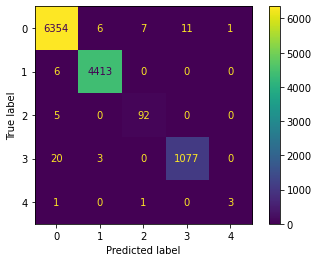



Class 0: precision=0.99499, recall=0.99608, f-measure=0.99553, true labels=6379
Class 1: precision=0.99796, recall=0.99864, f-measure=0.99830, true labels=4419
Class 2: precision=0.92000, recall=0.94845, f-measure=0.93401, true labels=97
Class 3: precision=0.98989, recall=0.97909, f-measure=0.98446, true labels=1100
Class 4: precision=0.75000, recall=0.60000, f-measure=0.66667, true labels=5

Accuracy = 0.99492
Macro Precision = 0.93057
Macro Recall = 0.90445
Marco F-measure = 0.91732


Fold 5: 

Confusion matrix



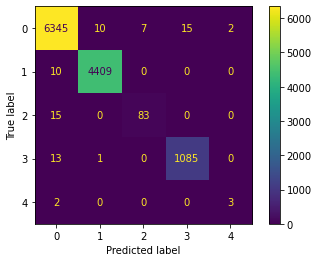



Class 0: precision=0.99374, recall=0.99467, f-measure=0.99420, true labels=6379
Class 1: precision=0.99751, recall=0.99774, f-measure=0.99762, true labels=4419
Class 2: precision=0.92222, recall=0.84694, f-measure=0.88298, true labels=98
Class 3: precision=0.98636, recall=0.98726, f-measure=0.98681, true labels=1099
Class 4: precision=0.60000, recall=0.60000, f-measure=0.60000, true labels=5

Accuracy = 0.99375
Macro Precision = 0.89997
Macro Recall = 0.88532
Marco F-measure = 0.89258


Ks: 5
Overall scores:
Accuracy = 0.99442
Precision = 0.91184
Recall = 0.85477
F-measure = 0.88139

run time:58.75819635391235 s
----------- Ks: 7 -------------

Fold 1: 

Confusion matrix



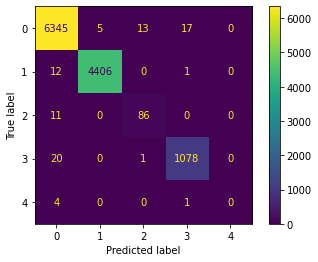



Class 0: precision=0.99265, recall=0.99451, f-measure=0.99358, true labels=6380
Class 1: precision=0.99887, recall=0.99706, f-measure=0.99796, true labels=4419
Class 2: precision=0.86000, recall=0.88660, f-measure=0.87310, true labels=97
Class 3: precision=0.98268, recall=0.98089, f-measure=0.98179, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99292
Macro Precision = 0.76684
Macro Recall = 0.77181
Marco F-measure = 0.76932



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



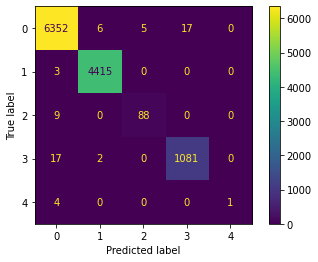



Class 0: precision=0.99483, recall=0.99561, f-measure=0.99522, true labels=6380
Class 1: precision=0.99819, recall=0.99932, f-measure=0.99876, true labels=4418
Class 2: precision=0.94624, recall=0.90722, f-measure=0.92632, true labels=97
Class 3: precision=0.98452, recall=0.98273, f-measure=0.98362, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.99475
Macro Precision = 0.98476
Macro Recall = 0.81698
Marco F-measure = 0.89306


Fold 3: 

Confusion matrix



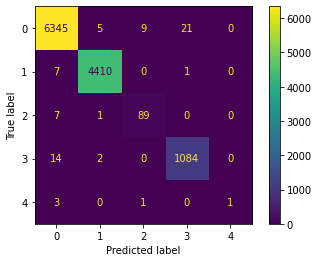



Class 0: precision=0.99514, recall=0.99451, f-measure=0.99483, true labels=6380
Class 1: precision=0.99819, recall=0.99819, f-measure=0.99819, true labels=4418
Class 2: precision=0.89899, recall=0.91753, f-measure=0.90816, true labels=97
Class 3: precision=0.98011, recall=0.98545, f-measure=0.98277, true labels=1100
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.99408
Macro Precision = 0.97449
Macro Recall = 0.81914
Marco F-measure = 0.89009


Fold 4: 

Confusion matrix



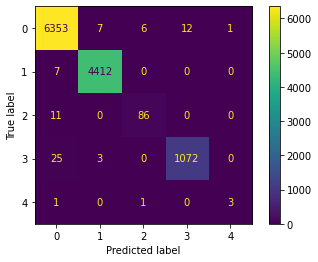



Class 0: precision=0.99312, recall=0.99592, f-measure=0.99452, true labels=6379
Class 1: precision=0.99774, recall=0.99842, f-measure=0.99808, true labels=4419
Class 2: precision=0.92473, recall=0.88660, f-measure=0.90526, true labels=97
Class 3: precision=0.98893, recall=0.97455, f-measure=0.98168, true labels=1100
Class 4: precision=0.75000, recall=0.60000, f-measure=0.66667, true labels=5

Accuracy = 0.99383
Macro Precision = 0.9309
Macro Recall = 0.8911
Marco F-measure = 0.91057


Fold 5: 

Confusion matrix



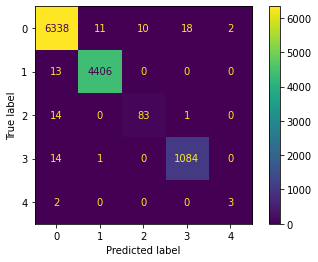



Class 0: precision=0.99326, recall=0.99357, f-measure=0.99342, true labels=6379
Class 1: precision=0.99728, recall=0.99706, f-measure=0.99717, true labels=4419
Class 2: precision=0.89247, recall=0.84694, f-measure=0.86911, true labels=98
Class 3: precision=0.98277, recall=0.98635, f-measure=0.98456, true labels=1099
Class 4: precision=0.60000, recall=0.60000, f-measure=0.60000, true labels=5

Accuracy = 0.99283
Macro Precision = 0.89316
Macro Recall = 0.88478
Marco F-measure = 0.88895


Ks: 7
Overall scores:
Accuracy = 0.99368
Precision = 0.91003
Recall = 0.83676
F-measure = 0.87040

run time:59.80300688743591 s
----------- Ks: 10 -------------

Fold 1: 

Confusion matrix



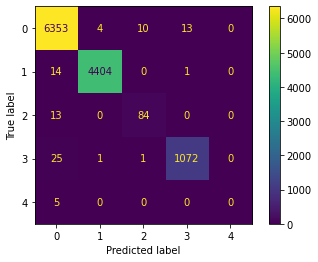



Class 0: precision=0.99111, recall=0.99577, f-measure=0.99343, true labels=6380
Class 1: precision=0.99887, recall=0.99661, f-measure=0.99773, true labels=4419
Class 2: precision=0.88421, recall=0.86598, f-measure=0.87500, true labels=97
Class 3: precision=0.98711, recall=0.97543, f-measure=0.98124, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99275
Macro Precision = 0.77226
Macro Recall = 0.76676
Marco F-measure = 0.7695



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



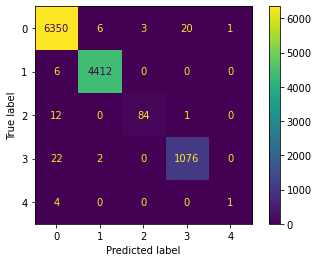



Class 0: precision=0.99312, recall=0.99530, f-measure=0.99421, true labels=6380
Class 1: precision=0.99819, recall=0.99864, f-measure=0.99842, true labels=4418
Class 2: precision=0.96552, recall=0.86598, f-measure=0.91304, true labels=97
Class 3: precision=0.98086, recall=0.97818, f-measure=0.97952, true labels=1100
Class 4: precision=0.50000, recall=0.20000, f-measure=0.28571, true labels=5

Accuracy = 0.99358
Macro Precision = 0.88754
Macro Recall = 0.80762
Marco F-measure = 0.8457


Fold 3: 

Confusion matrix



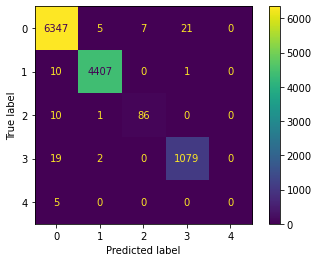



Class 0: precision=0.99312, recall=0.99483, f-measure=0.99397, true labels=6380
Class 1: precision=0.99819, recall=0.99751, f-measure=0.99785, true labels=4418
Class 2: precision=0.92473, recall=0.88660, f-measure=0.90526, true labels=97
Class 3: precision=0.98002, recall=0.98091, f-measure=0.98046, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99325
Macro Precision = 0.77921
Macro Recall = 0.77197
Marco F-measure = 0.77557



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4: 

Confusion matrix



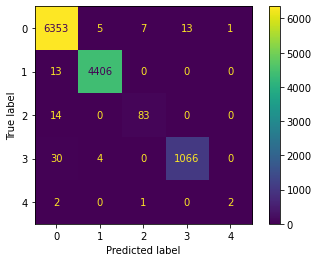



Class 0: precision=0.99080, recall=0.99592, f-measure=0.99335, true labels=6379
Class 1: precision=0.99796, recall=0.99706, f-measure=0.99751, true labels=4419
Class 2: precision=0.91209, recall=0.85567, f-measure=0.88298, true labels=97
Class 3: precision=0.98795, recall=0.96909, f-measure=0.97843, true labels=1100
Class 4: precision=0.66667, recall=0.40000, f-measure=0.50000, true labels=5

Accuracy = 0.9925
Macro Precision = 0.91109
Macro Recall = 0.84355
Marco F-measure = 0.87602


Fold 5: 

Confusion matrix



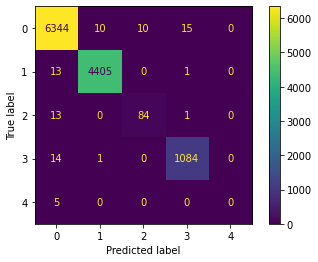



Class 0: precision=0.99296, recall=0.99451, f-measure=0.99373, true labels=6379
Class 1: precision=0.99751, recall=0.99683, f-measure=0.99717, true labels=4419
Class 2: precision=0.89362, recall=0.85714, f-measure=0.87500, true labels=98
Class 3: precision=0.98456, recall=0.98635, f-measure=0.98545, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99308
Macro Precision = 0.77373
Macro Recall = 0.76697
Marco F-measure = 0.77034


Ks: 10
Overall scores:
Accuracy = 0.99303
Precision = 0.82477
Recall = 0.79137
F-measure = 0.80743

run time:58.884706020355225 s
----------- Ks: 12 -------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 1: 

Confusion matrix



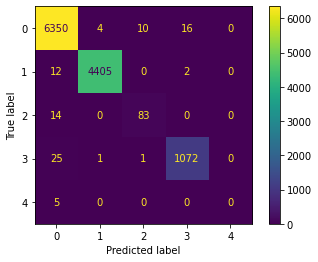



Class 0: precision=0.99126, recall=0.99530, f-measure=0.99327, true labels=6380
Class 1: precision=0.99887, recall=0.99683, f-measure=0.99785, true labels=4419
Class 2: precision=0.88298, recall=0.85567, f-measure=0.86911, true labels=97
Class 3: precision=0.98349, recall=0.97543, f-measure=0.97944, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.9925
Macro Precision = 0.77132
Macro Recall = 0.76465
Marco F-measure = 0.76797



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



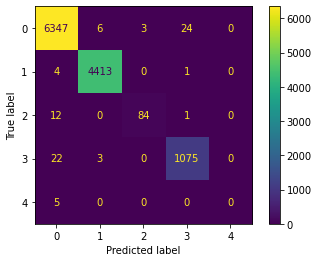



Class 0: precision=0.99327, recall=0.99483, f-measure=0.99405, true labels=6380
Class 1: precision=0.99796, recall=0.99887, f-measure=0.99842, true labels=4418
Class 2: precision=0.96552, recall=0.86598, f-measure=0.91304, true labels=97
Class 3: precision=0.97639, recall=0.97727, f-measure=0.97683, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99325
Macro Precision = 0.78663
Macro Recall = 0.76739
Marco F-measure = 0.77689



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 3: 

Confusion matrix



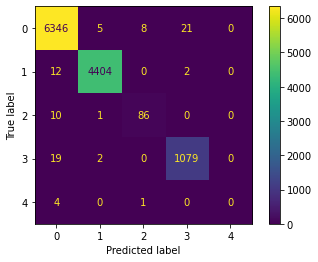



Class 0: precision=0.99296, recall=0.99467, f-measure=0.99381, true labels=6380
Class 1: precision=0.99819, recall=0.99683, f-measure=0.99751, true labels=4418
Class 2: precision=0.90526, recall=0.88660, f-measure=0.89583, true labels=97
Class 3: precision=0.97913, recall=0.98091, f-measure=0.98002, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99292
Macro Precision = 0.77511
Macro Recall = 0.7718
Marco F-measure = 0.77345



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4: 

Confusion matrix



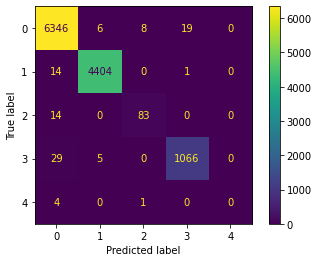



Class 0: precision=0.99048, recall=0.99483, f-measure=0.99265, true labels=6379
Class 1: precision=0.99751, recall=0.99661, f-measure=0.99706, true labels=4419
Class 2: precision=0.90217, recall=0.85567, f-measure=0.87831, true labels=97
Class 3: precision=0.98158, recall=0.96909, f-measure=0.97530, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99158
Macro Precision = 0.77435
Macro Recall = 0.76324
Marco F-measure = 0.76875



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 5: 

Confusion matrix



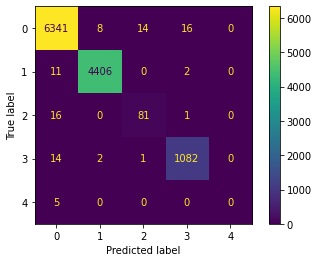



Class 0: precision=0.99280, recall=0.99404, f-measure=0.99342, true labels=6379
Class 1: precision=0.99774, recall=0.99706, f-measure=0.99740, true labels=4419
Class 2: precision=0.84375, recall=0.82653, f-measure=0.83505, true labels=98
Class 3: precision=0.98274, recall=0.98453, f-measure=0.98364, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.9925
Macro Precision = 0.76341
Macro Recall = 0.76043
Marco F-measure = 0.76192


Ks: 12
Overall scores:
Accuracy = 0.99255
Precision = 0.77416
Recall = 0.76550
F-measure = 0.76980

run time:65.28710794448853 s
----------- Ks: 15 -------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 1: 

Confusion matrix



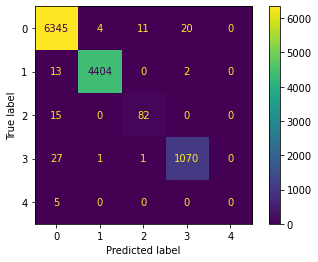



Class 0: precision=0.99063, recall=0.99451, f-measure=0.99257, true labels=6380
Class 1: precision=0.99887, recall=0.99661, f-measure=0.99773, true labels=4419
Class 2: precision=0.87234, recall=0.84536, f-measure=0.85864, true labels=97
Class 3: precision=0.97985, recall=0.97361, f-measure=0.97672, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99175
Macro Precision = 0.76834
Macro Recall = 0.76202
Marco F-measure = 0.76517



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



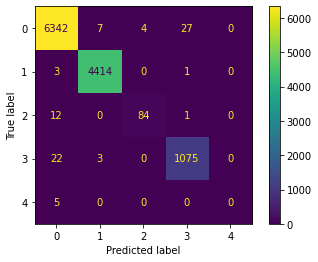



Class 0: precision=0.99342, recall=0.99404, f-measure=0.99373, true labels=6380
Class 1: precision=0.99774, recall=0.99909, f-measure=0.99842, true labels=4418
Class 2: precision=0.95455, recall=0.86598, f-measure=0.90811, true labels=97
Class 3: precision=0.97373, recall=0.97727, f-measure=0.97550, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99292
Macro Precision = 0.78389
Macro Recall = 0.76728
Marco F-measure = 0.7755



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 3: 

Confusion matrix



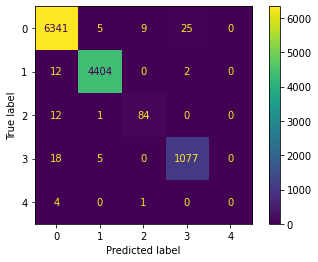



Class 0: precision=0.99280, recall=0.99389, f-measure=0.99334, true labels=6380
Class 1: precision=0.99751, recall=0.99683, f-measure=0.99717, true labels=4418
Class 2: precision=0.89362, recall=0.86598, f-measure=0.87958, true labels=97
Class 3: precision=0.97554, recall=0.97909, f-measure=0.97731, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99217
Macro Precision = 0.77189
Macro Recall = 0.76716
Marco F-measure = 0.76952



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4: 

Confusion matrix



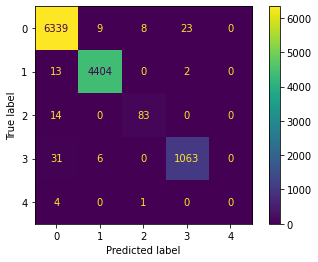



Class 0: precision=0.99031, recall=0.99373, f-measure=0.99202, true labels=6379
Class 1: precision=0.99661, recall=0.99661, f-measure=0.99661, true labels=4419
Class 2: precision=0.90217, recall=0.85567, f-measure=0.87831, true labels=97
Class 3: precision=0.97702, recall=0.96636, f-measure=0.97166, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99075
Macro Precision = 0.77322
Macro Recall = 0.76247
Marco F-measure = 0.76781



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 5: 

Confusion matrix



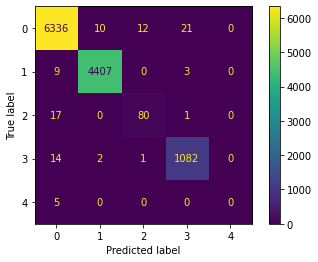



Class 0: precision=0.99295, recall=0.99326, f-measure=0.99310, true labels=6379
Class 1: precision=0.99728, recall=0.99728, f-measure=0.99728, true labels=4419
Class 2: precision=0.86022, recall=0.81633, f-measure=0.83770, true labels=98
Class 3: precision=0.97742, recall=0.98453, f-measure=0.98096, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99208
Macro Precision = 0.76557
Macro Recall = 0.75828
Marco F-measure = 0.76191


Ks: 15
Overall scores:
Accuracy = 0.99193
Precision = 0.77258
Recall = 0.76344
F-measure = 0.76798

run time:61.813761949539185 s
----------- Ks: 20 -------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 1: 

Confusion matrix



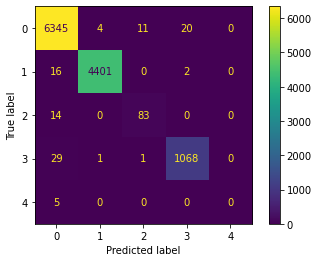



Class 0: precision=0.99001, recall=0.99451, f-measure=0.99226, true labels=6380
Class 1: precision=0.99887, recall=0.99593, f-measure=0.99739, true labels=4419
Class 2: precision=0.87368, recall=0.85567, f-measure=0.86458, true labels=97
Class 3: precision=0.97982, recall=0.97179, f-measure=0.97579, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99142
Macro Precision = 0.76848
Macro Recall = 0.76358
Marco F-measure = 0.76602



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



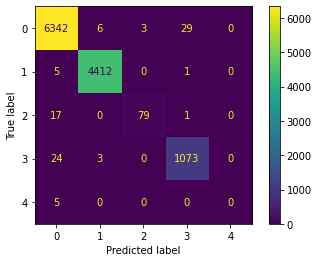



Class 0: precision=0.99202, recall=0.99404, f-measure=0.99303, true labels=6380
Class 1: precision=0.99796, recall=0.99864, f-measure=0.99830, true labels=4418
Class 2: precision=0.96341, recall=0.81443, f-measure=0.88268, true labels=97
Class 3: precision=0.97192, recall=0.97545, f-measure=0.97368, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99217
Macro Precision = 0.78506
Macro Recall = 0.75651
Marco F-measure = 0.77052



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 3: 

Confusion matrix



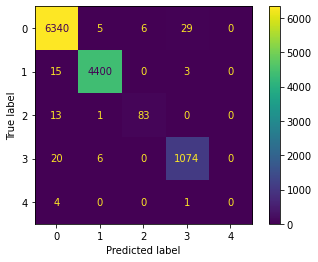



Class 0: precision=0.99186, recall=0.99373, f-measure=0.99280, true labels=6380
Class 1: precision=0.99728, recall=0.99593, f-measure=0.99660, true labels=4418
Class 2: precision=0.93258, recall=0.85567, f-measure=0.89247, true labels=97
Class 3: precision=0.97019, recall=0.97636, f-measure=0.97327, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.99142
Macro Precision = 0.77838
Macro Recall = 0.76434
Marco F-measure = 0.7713



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4: 

Confusion matrix



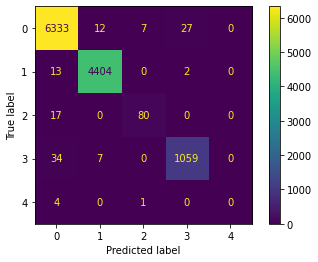



Class 0: precision=0.98938, recall=0.99279, f-measure=0.99108, true labels=6379
Class 1: precision=0.99570, recall=0.99661, f-measure=0.99615, true labels=4419
Class 2: precision=0.90909, recall=0.82474, f-measure=0.86486, true labels=97
Class 3: precision=0.97335, recall=0.96273, f-measure=0.96801, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98967
Macro Precision = 0.7735
Macro Recall = 0.75537
Marco F-measure = 0.76433



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 5: 

Confusion matrix



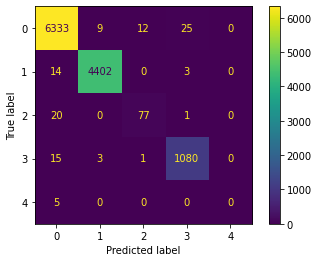



Class 0: precision=0.99155, recall=0.99279, f-measure=0.99217, true labels=6379
Class 1: precision=0.99728, recall=0.99615, f-measure=0.99672, true labels=4419
Class 2: precision=0.85556, recall=0.78571, f-measure=0.81915, true labels=98
Class 3: precision=0.97385, recall=0.98271, f-measure=0.97826, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.991
Macro Precision = 0.76365
Macro Recall = 0.75147
Marco F-measure = 0.75751


Ks: 20
Overall scores:
Accuracy = 0.99114
Precision = 0.77381
Recall = 0.75825
F-measure = 0.76594

run time:66.02991390228271 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Ks = [1, 2, 3, 4, 5, 7, 10, 12, 15, 20]                                         #Ks values, on which to iterate
for Key in Ks:
    print("----------- Ks: "+str(Key) +" -------------")
    start_time = time.time()
    scores, precisions, recalls, fmeasures = [],[],[],[]
    knn = KNeighborsClassifier(n_neighbors=Key)
    kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)         

    for k, (train, test) in enumerate(kfold.split(X_train, Y_train)):
        knn.fit(X_train[train], Y_train[train])                                 
        validation_predictions = knn.predict(X_train[test])
        score=float("{:.5f}".format(accuracy_score(Y_train[test], validation_predictions)))   
        print("\nFold " + str(k+1) +": \n")
                                   
        print("Confusion matrix"+"\n")
        cm=confusion_matrix(Y_train[test], validation_predictions, labels=knn.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
        disp.plot()
        plt.show() 
        print("\n")

        meas = precision_recall_fscore_support(Y_train[test], validation_predictions, average=None)
        precision, recall = [],[]
        for i in range(len(knn.classes_)):
            print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
            precision.append(meas[0][i]) 
            recall.append(meas[1][i])
           
        macro_precision = float("{:.5f}".format(statistics.mean(precision)))    
        macro_recall = float("{:.5f}".format(statistics.mean(recall)))
        macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
        scores.append(score)
        precision.clear()
        recall.clear()
        print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
        
        precisions.append(macro_precision)                                      
        recalls.append(macro_recall)
        fmeasures.append(macro_fmeasure)

    print("\nKs: " + str(Key) +"\nOverall scores:")
    print("Accuracy = {:.5f}".format(np.array(scores).mean()))                  
    print("Precision = {:.5f}".format(np.array(precisions).mean()))
    print("Recall = {:.5f}".format(np.array(recalls).mean()))
    print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
    print("run time:" +str(time.time()-start_time) + " s")

<h3 align ="center"> <font color = "orange">Decision Tree</h3>


<p align="justify"> Decision Tree algorithm is used by applying the theories of decision trees: after having represented the dataset (whether it is training or test) <b>as a graph in which the nodes are the leaves, and the arcs represent the possible choices between the leaves, responding to a series of classification questions he succeeds in identifying the class associated with each leaf</b>.

<p align="justify">Prediction is done by declaring a predetermined depth level in the max_depth attribute. The greater the depth, the greater the complexity of the model, which is not necessarily synonymous with greater performance.

<p align="justify"><b> In fact, in this case, the depth level for which the best performance was identified is 6</b>.

Decision tree


Fold 1: 

Confusion matrix



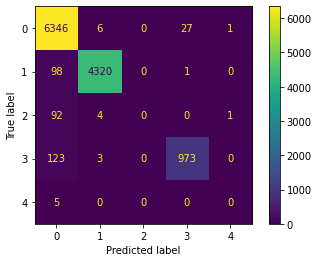



Class 0: precision=0.95228, recall=0.99467, f-measure=0.97301, true labels=6380
Class 1: precision=0.99700, recall=0.97760, f-measure=0.98720, true labels=4419
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=97
Class 3: precision=0.97203, recall=0.88535, f-measure=0.92667, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.96992
Macro Precision = 0.58426
Macro Recall = 0.57152
Marco F-measure = 0.57782



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



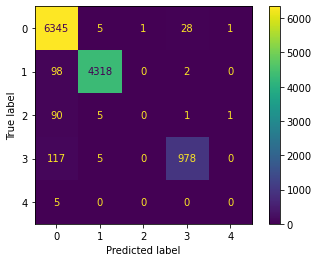



Class 0: precision=0.95342, recall=0.99451, f-measure=0.97353, true labels=6380
Class 1: precision=0.99654, recall=0.97737, f-measure=0.98686, true labels=4418
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=97
Class 3: precision=0.96928, recall=0.88909, f-measure=0.92745, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.97008
Macro Precision = 0.58385
Macro Recall = 0.57219
Marco F-measure = 0.57796


Fold 3: 

Confusion matrix



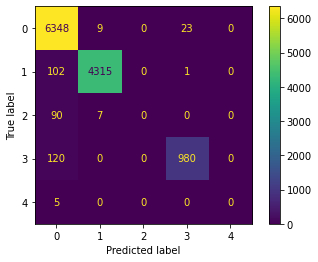



Class 0: precision=0.95244, recall=0.99498, f-measure=0.97325, true labels=6380
Class 1: precision=0.99631, recall=0.97669, f-measure=0.98640, true labels=4418
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=97
Class 3: precision=0.97610, recall=0.89091, f-measure=0.93156, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.97025
Macro Precision = 0.58497
Macro Recall = 0.57252
Marco F-measure = 0.57868



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4: 

Confusion matrix



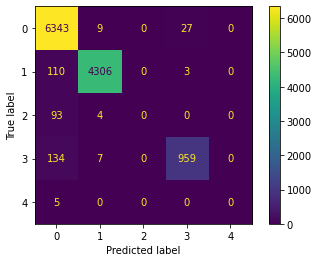



Class 0: precision=0.94884, recall=0.99436, f-measure=0.97107, true labels=6379
Class 1: precision=0.99538, recall=0.97443, f-measure=0.98479, true labels=4419
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=97
Class 3: precision=0.96967, recall=0.87182, f-measure=0.91814, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.96733
Macro Precision = 0.58278
Macro Recall = 0.56812
Marco F-measure = 0.57536



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 5: 

Confusion matrix



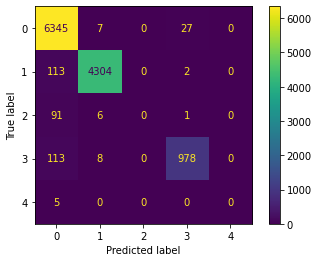



Class 0: precision=0.95170, recall=0.99467, f-measure=0.97271, true labels=6379
Class 1: precision=0.99514, recall=0.97398, f-measure=0.98445, true labels=4419
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=98
Class 3: precision=0.97024, recall=0.88990, f-measure=0.92833, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.96892
Macro Precision = 0.58342
Macro Recall = 0.57171
Marco F-measure = 0.57751


Overall scores:
Accuracy = 0.96930
Precision = 0.58386
Recall = 0.57121
F-measure = 0.57747

run time:5.035123586654663 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
start_time = time.time()
tree = DecisionTreeClassifier(criterion="gini", max_depth=6) 
#Gini is the default impurity evaluation criterion: as it's default, we could omit it, or replace it with other cryteria (Entropy...)
#Max_depth is instead the max number of levels the tree can have
kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)             
scores, precisions, recalls, fmeasures = [],[],[],[]
print("Decision tree\n")

for k, (train, test) in enumerate(kfold.split(X_train, Y_train)):
    tree.fit(X_train[train], Y_train[train])                                    
    validation_predictions = tree.predict(X_train[test])
    score=float("{:.5f}".format(accuracy_score(Y_train[test], validation_predictions)))   
    print("\nFold " + str(k+1) +": \n")   
                                     
    print("Confusion matrix"+"\n")
    cm=confusion_matrix(Y_train[test], validation_predictions, labels=tree.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
    disp.plot()
    plt.show() 
    print("\n")

    meas = precision_recall_fscore_support(Y_train[test], validation_predictions, average=None)
    precision, recall = [],[]
    for i in range(len(tree.classes_)):
        print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
        precision.append(meas[0][i]) 
        recall.append(meas[1][i])
        
    macro_precision = float("{:.5f}".format(statistics.mean(precision)))      
    macro_recall = float("{:.5f}".format(statistics.mean(recall)))
    macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
    scores.append(score)
    precision.clear()
    recall.clear()
    print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
    
    precisions.append(macro_precision)                                 
    recalls.append(macro_recall)
    fmeasures.append(macro_fmeasure)

print("\nOverall scores:")
print("Accuracy = {:.5f}".format(np.array(scores).mean()))                      
print("Precision = {:.5f}".format(np.array(precisions).mean()))
print("Recall = {:.5f}".format(np.array(recalls).mean()))
print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
print("run time:" +str(time.time()-start_time) + " s")

<h3 align ="center"> <font color = "orange">Random forest </h3>

<p align="justify">Random Forest algorithm applies <b>n number of times the Decision Tree algorithm</b>, each on a different dataset partition (Ensamble).

<p align="justify">Prediction is done by declaring a predetermined depth level in the max_depth attribute. The greater the depth, the greater the complexity of the model, which is not necessarily synonymous with greater performance.

<p align="justify"><b> In fact, in this case, the depth level for which the best performance was identified is 8</b>.

Random forest


Fold 1: 

Confusion matrix



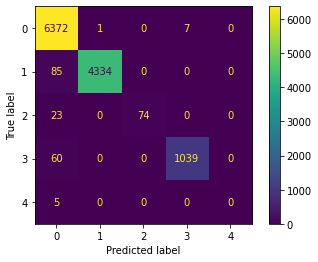



Class 0: precision=0.97357, recall=0.99875, f-measure=0.98600, true labels=6380
Class 1: precision=0.99977, recall=0.98076, f-measure=0.99018, true labels=4419
Class 2: precision=1.00000, recall=0.76289, f-measure=0.86550, true labels=97
Class 3: precision=0.99331, recall=0.94540, f-measure=0.96876, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98492
Macro Precision = 0.79333
Macro Recall = 0.73756
Marco F-measure = 0.76443



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2: 

Confusion matrix



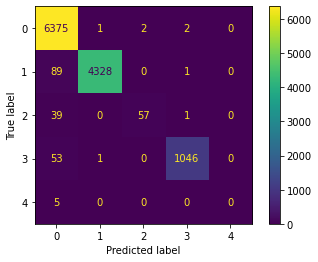



Class 0: precision=0.97165, recall=0.99922, f-measure=0.98524, true labels=6380
Class 1: precision=0.99954, recall=0.97963, f-measure=0.98948, true labels=4418
Class 2: precision=0.96610, recall=0.58763, f-measure=0.73077, true labels=97
Class 3: precision=0.99619, recall=0.95091, f-measure=0.97302, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98383
Macro Precision = 0.7867
Macro Recall = 0.70348
Marco F-measure = 0.74277



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 3: 

Confusion matrix



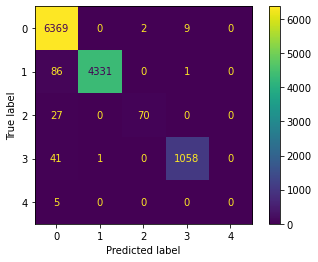



Class 0: precision=0.97564, recall=0.99828, f-measure=0.98683, true labels=6380
Class 1: precision=0.99977, recall=0.98031, f-measure=0.98994, true labels=4418
Class 2: precision=0.97222, recall=0.72165, f-measure=0.82840, true labels=97
Class 3: precision=0.99064, recall=0.96182, f-measure=0.97601, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98567
Macro Precision = 0.78765
Macro Recall = 0.73241
Marco F-measure = 0.75903



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 4: 

Confusion matrix



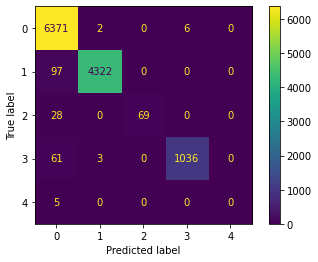



Class 0: precision=0.97089, recall=0.99875, f-measure=0.98462, true labels=6379
Class 1: precision=0.99884, recall=0.97805, f-measure=0.98834, true labels=4419
Class 2: precision=1.00000, recall=0.71134, f-measure=0.83133, true labels=97
Class 3: precision=0.99424, recall=0.94182, f-measure=0.96732, true labels=1100
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98317
Macro Precision = 0.7928
Macro Recall = 0.72599
Marco F-measure = 0.75793



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 5: 

Confusion matrix



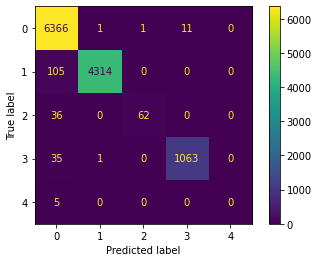



Class 0: precision=0.97235, recall=0.99796, f-measure=0.98499, true labels=6379
Class 1: precision=0.99954, recall=0.97624, f-measure=0.98775, true labels=4419
Class 2: precision=0.98413, recall=0.63265, f-measure=0.77019, true labels=98
Class 3: precision=0.98976, recall=0.96724, f-measure=0.97837, true labels=1099
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.98375
Macro Precision = 0.78916
Macro Recall = 0.71482
Marco F-measure = 0.75015


Overall scores:
Accuracy = 0.98427
Precision = 0.78993
Recall = 0.72285
F-measure = 0.75486

run time:64.55770182609558 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
start_time = time.time()
forest = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=False)      #100 is the empirical number that seems to output the best predictions; 8 is the same thing, but wrt the max tree depth
kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)                    
scores, precisions, recalls, fmeasures = [],[],[],[]
print("Random forest\n")

for k, (train, test) in enumerate(kfold.split(X_train, Y_train)):
    forest.fit(X_train[train], Y_train[train])                                                        
    validation_predictions = forest.predict(X_train[test])
    score=float("{:.5f}".format(accuracy_score(Y_train[test], validation_predictions)))  
    print("\nFold " + str(k+1) +": \n")   
                                      
    print("Confusion matrix"+"\n")
    cm=confusion_matrix(Y_train[test], validation_predictions, labels=forest.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
    disp.plot()
    plt.show() 
    print("\n")

    meas = precision_recall_fscore_support(Y_train[test], validation_predictions, average=None)
    precision, recall = [],[]
    for i in range(len(forest.classes_)):
        print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
        precision.append(meas[0][i]) 
        recall.append(meas[1][i])
        
    macro_precision = float("{:.5f}".format(statistics.mean(precision))) 
    macro_recall = float("{:.5f}".format(statistics.mean(recall)))
    macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
    scores.append(score)
    precision.clear()
    recall.clear()
    print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
    
    precisions.append(macro_precision)                                          
    recalls.append(macro_recall)
    fmeasures.append(macro_fmeasure)

print("\nOverall scores:")
print("Accuracy = {:.5f}".format(np.array(scores).mean()))                     
print("Precision = {:.5f}".format(np.array(precisions).mean()))
print("Recall = {:.5f}".format(np.array(recalls).mean()))
print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
print("run time:" +str(time.time()-start_time) + " s")

## <center><font color='orange'> **CHAPTER 6: ARTIFICIAL NEURAL NETWORKS** </font></center>




<p align="justify">As for the neural networks, let' start by re-regolarizing tha dataset and by re-executing a dimensionality reduction, so we are sure that we don't work with pre-processed data.


<p align="justify">This time, we do not decite to standardize over {-1,1}, but rather on a {0,1} set, as it's the range of values the NN require (as we're in classification, the activation function si expected to be a sigmoid). We're doing this by applying the "mms.fit_tranform()" function.

In [ ]:
X = data_df[:60000].drop("classification.", axis=1).values
Y = data_df[:60000]["classification."].values
X_train = X
Y_train = Y
 
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)

pca = PCA(0.90)
X_train = pca.fit_transform(X_train)
print(X_train.shape)

(60000, 7)


Let's now start with our training

<h3 align ="center"> <font color = "orange">Multilayer Perceptron </h3>

<p align="justify">A Multilayer Perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to mean any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation). Multilayer perceptrons are sometimes colloquially referred to as "vanilla" neural networks, especially when they have a single hidden layer.[1]

<p align="justify"><b> An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer</b> . Except for the input nodes, <b>each node is a neuron that uses a nonlinear activation function</b>. 

<p align="justify"><b>MLP utilizes a supervised learning technique called backpropagation for training</b>. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

Multilayer Perceptron



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Fold 1: 

Confusion matrix



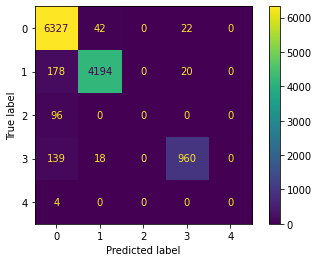



Class 0: precision=0.93817, recall=0.98999, f-measure=0.96338, true labels=6391
Class 1: precision=0.98590, recall=0.95492, f-measure=0.97016, true labels=4392
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=96
Class 3: precision=0.95808, recall=0.85944, f-measure=0.90609, true labels=1117
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=4

Accuracy = 0.95675
Macro Precision = 0.57643
Macro Recall = 0.56087
Marco F-measure = 0.56854



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Fold 2: 

Confusion matrix



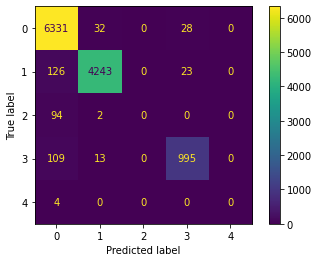



Class 0: precision=0.95003, recall=0.99061, f-measure=0.96990, true labels=6391
Class 1: precision=0.98904, recall=0.96607, f-measure=0.97742, true labels=4392
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=96
Class 3: precision=0.95124, recall=0.89078, f-measure=0.92002, true labels=1117
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=4

Accuracy = 0.96408
Macro Precision = 0.57806
Macro Recall = 0.56949
Marco F-measure = 0.57374



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 0.18971688
Iteration 2, loss = 0.09631271
Iteration 3, loss = 0.08005981
Iteration 4, loss = 0.07058750
Iteration 5, loss = 0.06417375


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Fold 3: 

Confusion matrix



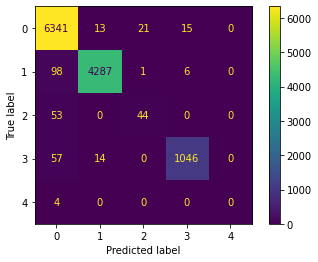



Class 0: precision=0.96765, recall=0.99233, f-measure=0.97983, true labels=6390
Class 1: precision=0.99374, recall=0.97609, f-measure=0.98484, true labels=4392
Class 2: precision=0.66667, recall=0.45361, f-measure=0.53988, true labels=97
Class 3: precision=0.98032, recall=0.93644, f-measure=0.95788, true labels=1117
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=4

Accuracy = 0.9765
Macro Precision = 0.72168
Macro Recall = 0.67169
Marco F-measure = 0.69579



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")



Fold 4: 

Confusion matrix



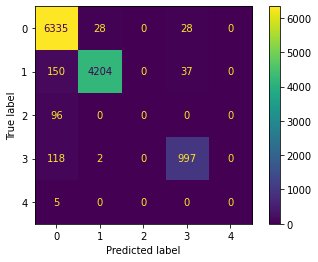



Class 0: precision=0.94496, recall=0.99124, f-measure=0.96754, true labels=6391
Class 1: precision=0.99291, recall=0.95741, f-measure=0.97484, true labels=4391
Class 2: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=96
Class 3: precision=0.93879, recall=0.89257, f-measure=0.91510, true labels=1117
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=5

Accuracy = 0.96133
Macro Precision = 0.57533
Macro Recall = 0.56824
Marco F-measure = 0.57176



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 1, loss = 0.19096645
Iteration 2, loss = 0.09780483
Iteration 3, loss = 0.08092266


In [ ]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes=(512,512), verbose = True, activation="relu", max_iter=20)
kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)   
scores, precisions, recalls, fmeasures = [],[],[],[]
print("Multilayer Perceptron\n")

for k, (train, test) in enumerate(kfold.split(X_train, Y_train)):
    mlp.fit(X_train[train], Y_train[train])                                             
    validation_predictions = mlp.predict(X_train[test])
    score=float("{:.5f}".format(accuracy_score(Y_train[test], validation_predictions))) 
    print("\nFold " + str(k+1) +": \n")   
                                      
    print("Confusion matrix"+"\n")
    cm=confusion_matrix(Y_train[test], validation_predictions, labels=mlp.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    disp.plot()
    plt.show() 
    print("\n")

    meas = precision_recall_fscore_support(Y_train[test], validation_predictions, average=None)
    precision, recall = [],[]
    for i in range(len(mlp.classes_)):
        print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
        precision.append(meas[0][i]) 
        recall.append(meas[1][i])
        
    macro_precision = float("{:.5f}".format(statistics.mean(precision))) 
    macro_recall = float("{:.5f}".format(statistics.mean(recall)))
    macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
    
    scores.append(score)
    precision.clear()
    recall.clear()

    print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
    precisions.append(macro_precision) 
    recalls.append(macro_recall)
    fmeasures.append(macro_fmeasure)

print("\nOverall scores:")
print("Accuracy = {:.5f}".format(np.array(scores).mean())) 
print("Precision = {:.5f}".format(np.array(precisions).mean()))
print("Recall = {:.5f}".format(np.array(recalls).mean()))
print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
print("run time: " + str(time.time()-start_time) + " s")

<h3 align ="center"> <font color = "orange">Convolutional Neural Network</h3>

<p align="justify">A Convolutional Neural Network (CNN, or ConvNet) is a class of artificial neural network (ANN), most commonly applied to analyze visual imagery. CNNs are also known as Shift Invariant or Space Invariant Artificial Neural Networks (SIANN), <b>based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation-equivariant responses known as feature maps</b>.

<p align="justify">Counter-intuitively, most Convolutional Neural Networks are not invariant to translation, due to the downsampling operation they apply to the input.

<p align="justify">They have applications in image and video recognition, recommender systems,image classification, image segmentation, medical image analysis, natural language processing, brain–computer interfaces, and financial time series.

Using Keras version: 2.8.0 backend: tensorflow
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14842123707751213907
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15920655856237962929
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
---------------------------------
(30000, 41, 2, 1) (30000, 5)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 41, 2, 32)         64        
                                                                 
 activation_15 (Activation)  (None, 41, 2, 32)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 2, 32)         1056      
     

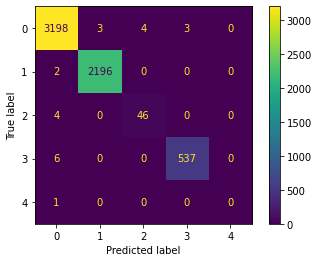



Class 0: precision=0.99595, recall=0.99688, f-measure=0.99642, true labels=3208
Class 1: precision=0.99864, recall=0.99909, f-measure=0.99886, true labels=2198
Class 2: precision=0.92000, recall=0.92000, f-measure=0.92000, true labels=50
Class 3: precision=0.99444, recall=0.98895, f-measure=0.99169, true labels=543
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=1

Accuracy = 0.99617
Macro Precision = 0.78181
Macro Recall = 0.78098
Marco F-measure = 0.78139

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


188/188 - 1s - loss: 0.0169 - accuracy: 0.9956 - 616ms/epoch - 3ms/step
Epoch 2/300
188/188 - 1s - loss: 0.0139 - accuracy: 0.9958 - 586ms/epoch - 3ms/step
Epoch 3/300
188/188 - 1s - loss: 0.0127 - accuracy: 0.9960 - 578ms/epoch - 3ms/step
Epoch 4/300
188/188 - 1s - loss: 0.0135 - accuracy: 0.9951 - 569ms/epoch - 3ms/step
Epoch 5/300
188/188 - 1s - loss: 0.0135 - accuracy: 0.9959 - 614ms/epoch - 3ms/step
Epoch 6/300
188/188 - 1s - loss: 0.0125 - accuracy: 0.9956 - 597ms/epoch - 3ms/step
Epoch 7/300
188/188 - 1s - loss: 0.0125 - accuracy: 0.9958 - 579ms/epoch - 3ms/step
Epoch 8/300
188/188 - 1s - loss: 0.0113 - accuracy: 0.9961 - 577ms/epoch - 3ms/step
Epoch 9/300
188/188 - 1s - loss: 0.0116 - accuracy: 0.9960 - 586ms/epoch - 3ms/step
Epoch 10/300
188/188 - 1s - loss: 0.0122 - accuracy: 0.9960 - 579ms/epoch - 3ms/step
Epoch 11/300
188/188 - 1s - loss: 0.0117 - accuracy: 0.9960 - 561ms/epoch - 3ms/step
Epoch 12/300
188/188 - 1s - loss: 0.0119 - accuracy: 0.9957 - 580ms/epoch - 3ms/step
E

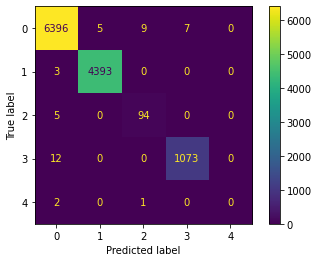



Class 0: precision=0.99657, recall=0.99673, f-measure=0.99665, true labels=6417
Class 1: precision=0.99886, recall=0.99932, f-measure=0.99909, true labels=4396
Class 2: precision=0.90385, recall=0.94949, f-measure=0.92611, true labels=99
Class 3: precision=0.99352, recall=0.98894, f-measure=0.99122, true labels=1085
Class 4: precision=0.00000, recall=0.00000, f-measure=0.00000, true labels=3

Accuracy = 0.99633
Macro Precision = 0.77856
Macro Recall = 0.7869
Marco F-measure = 0.78271

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


188/188 - 1s - loss: 0.0097 - accuracy: 0.9970 - 608ms/epoch - 3ms/step
Epoch 2/300
188/188 - 1s - loss: 0.0111 - accuracy: 0.9963 - 585ms/epoch - 3ms/step
Epoch 3/300
188/188 - 1s - loss: 0.0087 - accuracy: 0.9971 - 589ms/epoch - 3ms/step
Epoch 4/300
188/188 - 1s - loss: 0.0097 - accuracy: 0.9971 - 577ms/epoch - 3ms/step
Epoch 5/300
188/188 - 1s - loss: 0.0087 - accuracy: 0.9973 - 575ms/epoch - 3ms/step
Epoch 6/300
188/188 - 1s - loss: 0.0068 - accuracy: 0.9979 - 570ms/epoch - 3ms/step
Epoch 7/300
188/188 - 1s - loss: 0.0070 - accuracy: 0.9978 - 572ms/epoch - 3ms/step
Epoch 8/300
188/188 - 1s - loss: 0.0080 - accuracy: 0.9972 - 575ms/epoch - 3ms/step
Epoch 9/300
188/188 - 1s - loss: 0.0075 - accuracy: 0.9973 - 595ms/epoch - 3ms/step
Epoch 10/300
188/188 - 1s - loss: 0.0105 - accuracy: 0.9963 - 571ms/epoch - 3ms/step
Epoch 11/300
188/188 - 1s - loss: 0.0092 - accuracy: 0.9971 - 587ms/epoch - 3ms/step
Epoch 12/300
188/188 - 1s - loss: 0.0084 - accuracy: 0.9971 - 573ms/epoch - 3ms/step
E

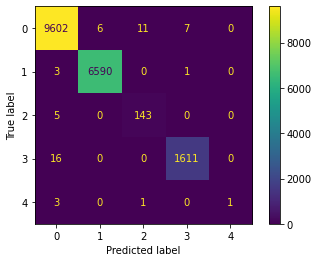



Class 0: precision=0.99720, recall=0.99751, f-measure=0.99735, true labels=9626
Class 1: precision=0.99909, recall=0.99939, f-measure=0.99924, true labels=6594
Class 2: precision=0.92258, recall=0.96622, f-measure=0.94389, true labels=148
Class 3: precision=0.99506, recall=0.99017, f-measure=0.99261, true labels=1627
Class 4: precision=1.00000, recall=0.20000, f-measure=0.33333, true labels=5

Accuracy = 0.99706
Macro Precision = 0.98279
Macro Recall = 0.83066
Marco F-measure = 0.90034

Epoch 1/300
188/188 - 1s - loss: 0.0061 - accuracy: 0.9978 - 580ms/epoch - 3ms/step
Epoch 2/300
188/188 - 1s - loss: 0.0091 - accuracy: 0.9971 - 587ms/epoch - 3ms/step
Epoch 3/300
188/188 - 1s - loss: 0.0082 - accuracy: 0.9973 - 603ms/epoch - 3ms/step
Epoch 4/300
188/188 - 1s - loss: 0.0057 - accuracy: 0.9980 - 572ms/epoch - 3ms/step
Epoch 5/300
188/188 - 1s - loss: 0.0071 - accuracy: 0.9973 - 581ms/epoch - 3ms/step
Epoch 6/300
188/188 - 1s - loss: 0.0077 - accuracy: 0.9975 - 571ms/epoch - 3ms/step
Ep

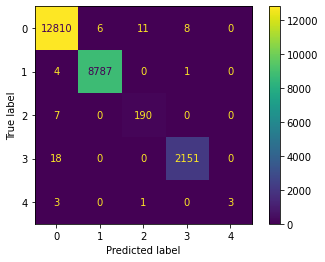



Class 0: precision=0.99751, recall=0.99805, f-measure=0.99778, true labels=12835
Class 1: precision=0.99932, recall=0.99943, f-measure=0.99937, true labels=8792
Class 2: precision=0.94059, recall=0.96447, f-measure=0.95238, true labels=197
Class 3: precision=0.99583, recall=0.99170, f-measure=0.99376, true labels=2169
Class 4: precision=1.00000, recall=0.42857, f-measure=0.60000, true labels=7

Accuracy = 0.99754
Macro Precision = 0.98665
Macro Recall = 0.87644
Marco F-measure = 0.92829

Epoch 1/300
188/188 - 1s - loss: 0.0065 - accuracy: 0.9978 - 607ms/epoch - 3ms/step
Epoch 2/300
188/188 - 1s - loss: 0.0075 - accuracy: 0.9981 - 573ms/epoch - 3ms/step
Epoch 3/300
188/188 - 1s - loss: 0.0040 - accuracy: 0.9987 - 586ms/epoch - 3ms/step
Epoch 4/300
188/188 - 1s - loss: 0.0062 - accuracy: 0.9979 - 587ms/epoch - 3ms/step
Epoch 5/300
188/188 - 1s - loss: 0.0055 - accuracy: 0.9981 - 572ms/epoch - 3ms/step
Epoch 6/300
188/188 - 1s - loss: 0.0050 - accuracy: 0.9983 - 584ms/epoch - 3ms/step
E

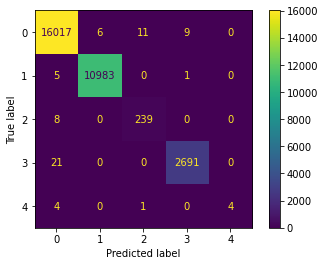



Class 0: precision=0.99763, recall=0.99838, f-measure=0.99801, true labels=16043
Class 1: precision=0.99945, recall=0.99945, f-measure=0.99945, true labels=10989
Class 2: precision=0.95219, recall=0.96761, f-measure=0.95984, true labels=247
Class 3: precision=0.99630, recall=0.99226, f-measure=0.99427, true labels=2712
Class 4: precision=1.00000, recall=0.44444, f-measure=0.61538, true labels=9

Accuracy = 0.9978
Macro Precision = 0.98912
Macro Recall = 0.88043
Marco F-measure = 0.93162


Overall scores:
Accuracy = 0.99698
Precision = 0.90379
Recall = 0.83108
F-measure = 0.86487

run time: 987.9846749305725 s


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

if K.backend() == "tensorflow":
    from tensorflow.python.client import device_lib
    print(device_lib.list_local_devices())

print("---------------------------------")

#Dataset re-processing
X = data_df[:60000].drop("classification.", axis=1).values
Y = data_df[:60000]["classification."].values
X_train = X
Y_train = Y

#one-hot encoding
classes = 5

X_train = X_train.astype('float32')
y_train = np_utils.to_categorical(Y_train, classes)

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)

#We structure our input vectors in matrix form (2x41), by unifying two logs at a time, and by considering only the second one's label
X_train = X_train.reshape(int(X_train.shape[0]/2), int(X_train.shape[1]), 2, 1)

value1 = int(y_train.shape[0]/2)
for k in range(0, value1):
  y_train = np.delete(y_train, k, axis = 0)

input_shape = (X_train.shape[1], 2, 1)
print(X_train.shape, y_train.shape)

# We now set our number of layers
Filters = 32
#Convolution kernel size
Conv_size = (1, 1)
#Pooling area size for max pooling
Pool_size = (1, 1) 

model = Sequential()

model.add(Conv2D(Filters, Conv_size, padding='valid', input_shape = input_shape))
model.add(Activation('relu'))
model.add(Conv2D(Filters, Conv_size))
model.add(Activation('relu'))
model.add(Conv2D(Filters, Conv_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=Pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

epochs = 300 # one epoch takes about 45 seconds
list_y = []
list_pred = []

start_time = time.time()  
kfold = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)  
scores, precisions, recalls, fmeasures = [],[],[],[]
print("Convolutional Neural Network\n")

for k, (train_index, test_index) in enumerate(kfold.split(X_train, y_train.argmax(1))):
  X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
  y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
  history = model.fit(X_train_kf,                                               #Apply the algorithm on each fold
                      y_train_kf, 
                      epochs=epochs, 
                      batch_size=128,
                      verbose=2)

  validation_predictions = model.predict(X_test_kf)
  count = 0
  for i in range(0,len(validation_predictions)):
    for j in range(0, len(validation_predictions[i])):
      if validation_predictions[i][j] == max(validation_predictions[i]):
        count = j
      else:
        count = count
    for j in range(0, len(validation_predictions[i])):
      validation_predictions[i][j] = 0
      validation_predictions[i][count] = 1      
  print(validation_predictions, validation_predictions.shape)
  print(y_test_kf, y_test_kf.shape)

  for i in range(0,len(validation_predictions)):
     for j in range(0, len(validation_predictions[i])):
       if y_test_kf[i][j] !=0:
          list_y.append(j)
       if validation_predictions[i][j] != 0:
          list_pred.append(j)
          
#  print("%%%%%%%%%%%%%%%%%%%%%%%%%%")
#  print(list_y, list_pred)
#  print(len(list_y), len(list_pred))
#  print("%%%%%%%%%%%%%%%%%%%%%%%%%%")

  score=float("{:.5f}".format(accuracy_score(list_y, list_pred)))               #Calculate the fold accuracy
  print("\nFold " + str(k+1) +": \n")   
                                     
  print("Confusion matrix"+"\n")
  cm=confusion_matrix(list_y, y_pred = list_pred, labels= svc.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= svc.classes_)
  disp.plot()
  plt.show() 
  print("\n")

  meas = precision_recall_fscore_support(list_y, list_pred, average=None)
  precision, recall = [],[]
  for i in range(len(svc.classes_)):
      print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
      precision.append(meas[0][i]) 
      recall.append(meas[1][i])
      
  macro_precision = float("{:.5f}".format(statistics.mean(precision))) 
  macro_recall = float("{:.5f}".format(statistics.mean(recall)))
  macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
  
  scores.append(score)
  precision.clear()
  recall.clear()
  
  print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")
  precisions.append(macro_precision) 
  recalls.append(macro_recall)
  fmeasures.append(macro_fmeasure)

print("\nOverall scores:")
print("Accuracy = {:.5f}".format(np.array(scores).mean())) 
print("Precision = {:.5f}".format(np.array(precisions).mean()))
print("Recall = {:.5f}".format(np.array(recalls).mean()))
print("F-measure = {:.5f}\n".format(np.array(fmeasures).mean()))
print("run time: " + str(time.time()-start_time) + " s")

## <center><font color='orange'> **CHAPTER 7: RESULTS AND BEST MODELS SELECTION** </font></center>

Let's now report the overall results obtained by training all the different models we've seen so far.

|    MODEL     |     ---\|    |  \|--- |  ---  | **OVERALL MEASURES (on 60k records)** | ---  |  ---\|   |
|:--------------:|:-------------:|:---------:|:---------:|:-------------------------------------:|:---------:|:--------------:|
|                |     <font color = "orange"> **Type**          | <font color = "orange"> **Accuracy** |<font color = "orange"> **Precision** |    <font color = "orange">    **Recall**  |<font color = "orange"> **F-measure** | <font color = "orange">**Run Time (60k)**|
|    <font color = "orange"> **SVM**    | **_Linear_**  |  0.95683	|0.74217|	0.57780|	0.64956|	110.158 s
|:----------------------------------:|------------------|:-------:|:-------:|:-------:|:-------:|:----------:|
|                | **_Poly_**    |  0.97652 |	0.91698	|0.76226	|0.83059|	41.662 s   |
|<font color = "orange"> **KERVEL SVM** | **_Rbf_**     |  0.98777|	0.88517|	0.76108|	0.81670|	48.453 s |
|                | **_Sigmoid_** |  0.85015|	0.45734|	0.43963|	0.44824|	164.331 s  |
|:----------------------------------:|------------------|:-------:|:-------:|:-------:|:-------:|:----------:|          |           |                                       |           |                |
| <font color = "orange">  **LOGISTIC LINEAR  REGRESSION**  | **_Grade 1_**    | 0.95633|0.69564|0.65082|0.67218|14.809 s |
| <font color = "orange">**LOGISTIC POLYNOMIAL REGRESSION** | **_Grade 2_**    | 0.99322 | 0.90734 | 0.84875 | 0.87695 | 3202.682 s |
|:----------------------------------:|------------------|:-------:|:-------:|:-------:|:-------:|:----------:|
|  <font color = "orange">         **ONE VS ALL**           | - | 0.94710|	0.64861|	0.57359|	0.60752	|30.992 s  |
|:----------------------------------:|------------------|:-------:|:-------:|:-------:|:-------:|:----------:|
|                                    | **_ks = 1_**     | 0.99602|0.93786|0.91661|0.92685|39.993 s |
|                                    | **_ks = 2_**    | 0.99551|0.96464|0.87835|0.91915|48.127 s  |
|                                    | **_ks = 3_**     | 0.99512|0.94526|0.88967|0.91617|44.974 s  |
|                                   | **_ks = 4_**     | 0.99467|0.95148|0.87427|0.91025|58.940 s  |
|           <font color = "orange">    **KNN**              | **_ks = 5_**     | 0.99442|0.91184|0.85477|0.88139|58.758 s |
|                                    | **_ks = 7_**     | 0.99368|0.91003|0.83676|0.87040|59.803 s  |
|                                    | **_ks = 10_**    | 0.99303|0.82477|0.79137|0.80743|58.885 s  |
|                                    | **_ks = 12_**    | 0.99255|0.77416|0.76550|0.76980|65.287 s |
|                                    | **_ks = 15_**    | 0.99193|0.77258|0.76344|0.76798|61.814 s |
|                                    | **_ks = 20_**    | 0.99114|0.77381|0.75825|0.76594|66.030 s |
|:---------------------------------:|----------------------|:-------:|:-------:|:-------:|:-------:|:---------:|
| <font color = "orange">**DECISION TREE** | - |0.96930|0.58386|0.57121|0.57747|5.035 s |
|         <font color = "orange">     **RANDOM FOREST**                     | -  | 0.98427|0.78993|0.72285|0.75486|64.558 s |
|:---------------------------------:|----------------------|:-------:|:-------:|:-------:|:-------:|:---------:|
|   <font color = "orange">     **NEURAL NETWORKS**        | **_MLP (20 iters)_** | 0.98468|0.73938|0.69936|0.71867|727.849 s |
|                                   | **CNN (300 epochs)**            |  0.99698       |  0.90379       |  0.83108       |  0.86487       |    987.984 s       ||


<p align="justify">Analyzing the table above, we can see how, among the classic ML models, the ones that seem to perform better (and not only in terms of accuracy, but also of f-measure) are the KNN and the rbf Kernel SVM.

<p align="justify">In the field of DL, on the other hand, CNN have guaranteed the best results low hands.

<p align="justify">However, again for the issues referred to in chapter 1 (i.e. that we need a performing system, but above all that is able, at the same time, to provide us with a prediction in an acceptable time) <b>the best model among those trained turns out to be by far the KNN, with a notable gap in terms of computation time of the predictions.</b>

<p align="justify">On 60,000 records we are in fact always below the minute of calculation (although we do not have powerful enough computers), while it is difficult for neural networks to return predictions in less than 15 minutes.

<p align="justify">Not to mention the polynomial logistic regressor, which took almost an hour.

<p align="justify">So, the way we will proceed now will be the following: we will import a new dataset (our test set, consisting of 6.000 records never seen before), we will re-train the best performing classifiers on the old training set, and we will then use them to carry out some predictions on the test set, with the aim of analyzing the results.

<p align="justify">And in the specific of KNN we will use a number of neighboring elements Ks = 3, a value at which the KNN seems to have returned the best results.

<h3 align ="center"> <font color = "orange">Data pre-processing</h3>

<p align="justify">So, let's now start again, by importing our test set, and by pre-processing it, as we've previously done with the train one.

In [ ]:
print(DATA.shape)
DATA_test = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/KDDTest-21aggregate.xlsx')
print(DATA_test.shape)

(125973, 42)
(11850, 42)


In [ ]:
DATA_test["classification."] = DATA_test["classification."].map(dictionary_target)
DATA_test["flag"] = DATA_test["flag"].map(dictionary3)
DATA_test["service"] = DATA_test["service"].map(dictionary2)
DATA_test["protocol_type"] = DATA_test["protocol_type"].map(dictionary1)

0 normal 2152 18.16%
1 Dos 4342 36.64%
2 R2L 2754 23.24%
3 Probe 2402 20.27%
4 U2R 200 1.69%


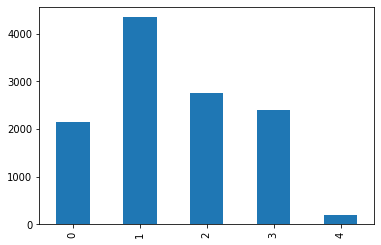

In [ ]:
x = DATA_test["classification."].value_counts().sort_index()
ax = x.plot(kind="bar")

sum =0
for i in x:
    sum += i    

for i,j in zip(dictionary_target,x):
    print(dictionary_target[i],i,j, str(round(100*j/sum,2))+"%")                   

<p align="justify">Just focus for a while on the test set distribution and on how the different classes tend to distribute in a very different way with respect to the training set one. 

<p align="justify">For example, for what it concerns the U2R, that was the less present attack in our train set (50 out of almost 125.000 logs), we can immediately recognize that is presence (if compared to the previous one) is absolutely huge: we're talking of 200 out of 12.000 logs.

<p align="justify">And the same stuff seems to happen in other classes, too.

<p align="justify">Due to this unbalancing, is not so unlikely to expect that our models will not so well perform on these new data, as they actually trained on logs that followed a totally different distribution.

In [ ]:
DATA_test = DATA_test.dropna(axis = 0)

data_test_df= DATA_test.sample(frac= 1)
data_train_df= data_df

X_train_tot = data_train_df[:60000].drop("classification.", axis=1).values
Y_train_tot = data_train_df[:60000]["classification."].values

X_test = data_test_df[:6000].drop("classification.", axis=1).values
Y_test = data_test_df[:6000]["classification."].values

print("Training set size: "+str(X_train_tot.shape))
print("Testing set size: "+str(X_test.shape))

Training set size: (60000, 41)
Testing set size: (6000, 41)


In [ ]:
ss = StandardScaler()

X_train_tot = ss.fit_transform(X_train_tot)
X_test = ss.transform(X_test)
X_train_tot = X_train_tot.astype('float32')
X_test = X_test.astype('float32')

from sklearn.decomposition import PCA
pca = PCA(0.90)
X_train_tot = pca.fit_transform(X_train_tot)
X_test = pca.transform(X_test)
print(X_train_tot.shape, X_test.shape)

(60000, 21) (6000, 21)


<h3 align ="center"> <font color = "orange">K-nearest neighbours</h3>

In [ ]:
print("----------- KNN - K=3 -------------")
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_tot,Y_train_tot)                                  
train_predictions = knn.predict(X_train_tot)
score_train=float("{:.5f}".format(accuracy_score(Y_train_tot, train_predictions)))    
print("Train Accuracy: ",score_train)

----------- KNN - K=3 -------------
Train Accuracy:  0.99777


Confusion matrix



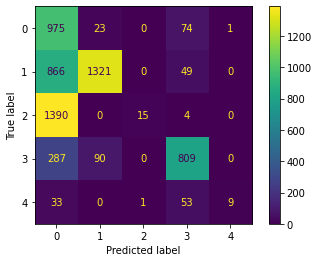



Class 0: precision=0.27457, recall=0.90867, f-measure=0.42171, true labels=1073
Class 1: precision=0.92120, recall=0.59079, f-measure=0.71989, true labels=2236
Class 2: precision=0.93750, recall=0.01065, f-measure=0.02105, true labels=1409
Class 3: precision=0.81800, recall=0.68212, f-measure=0.74391, true labels=1186
Class 4: precision=0.90000, recall=0.09375, f-measure=0.16981, true labels=96

Accuracy = 0.5215
Macro Precision = 0.77025
Macro Recall = 0.4572
Marco F-measure = 0.5738



In [ ]:
validation_predictions = knn.predict(X_test)
score=float("{:.5f}".format(accuracy_score(Y_test, validation_predictions)))    
                                
print("Confusion matrix"+"\n")
cm=confusion_matrix(Y_test, validation_predictions, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show() 
print("\n")

meas = precision_recall_fscore_support(Y_test, validation_predictions, average=None)
precision, recall = [],[]
for i in range(len(knn.classes_)):
    print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
    precision.append(meas[0][i]) 
    recall.append(meas[1][i])   

macro_precision = float("{:.5f}".format(statistics.mean(precision)))            
macro_recall = float("{:.5f}".format(statistics.mean(recall)))
macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")


<h3 align ="center"> <font color = "orange">RBF SVM Kernel</h3>

In [ ]:
print("----------- Kernel-SVM RBF -------------")

svc = SVC(kernel="rbf",max_iter=100000)                            

svc.fit(X_train_tot,Y_train_tot)                                                
train_predictions = svc.predict(X_train_tot)
score_train=float("{:.5f}".format(accuracy_score(Y_train_tot, train_predictions)))  
print("Train Accuracy: ", score_train)

----------- Kernel-SVM RBF -------------
Train Accuracy:  0.98817


Confusion matrix



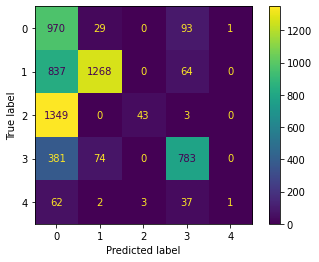



Class 0: precision=0.26952, recall=0.88747, f-measure=0.41347, true labels=1093
Class 1: precision=0.92353, recall=0.58460, f-measure=0.71598, true labels=2169
Class 2: precision=0.93478, recall=0.03082, f-measure=0.05968, true labels=1395
Class 3: precision=0.79898, recall=0.63247, f-measure=0.70604, true labels=1238
Class 4: precision=0.50000, recall=0.00952, f-measure=0.01869, true labels=105

Accuracy = 0.51083
Macro Precision = 0.68536
Macro Recall = 0.42898
Marco F-measure = 0.52768



In [ ]:
validation_predictions = svc.predict(X_test)
score=float("{:.5f}".format(accuracy_score(Y_test, validation_predictions)))   
                                
print("Confusion matrix"+"\n")
cm=confusion_matrix(Y_test, validation_predictions, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show() 
print("\n")

meas = precision_recall_fscore_support(Y_test, validation_predictions, average=None)
precision, recall = [],[]
for i in range(len(svc.classes_)):
    print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
    precision.append(meas[0][i]) 
    recall.append(meas[1][i])   

macro_precision = float("{:.5f}".format(statistics.mean(precision)))            
macro_recall = float("{:.5f}".format(statistics.mean(recall)))
macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")

<h3 align ="center"> <font color = "orange">CNN</h3>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

if K.backend() == "tensorflow":
    from tensorflow.python.client import device_lib
    print(device_lib.list_local_devices())

print("---------------------------------")

Using Keras version: 2.8.0 backend: tensorflow
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 830133538802369579
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13395103087229242537
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
---------------------------------


In [ ]:
X = data_df[:60000].drop("classification.", axis=1).values
Y = data_df[:60000]["classification."].values
X_train_tot = X
Y_train_tot = Y

X_test = data_test_df[:6000].drop("classification.", axis=1).values
Y_test = data_test_df[:6000]["classification."].values

print("Training set size: "+str(X_train_tot.shape))
print("Testing set size: "+str(X_test.shape))

#Pre-processing
#one-hot encoding
classes = 5

X_train_tot = X_train_tot.astype('float32')
X_test = X_test.astype('float32')

y_train_tot = np_utils.to_categorical(Y_train_tot, classes)
y_test = np_utils.to_categorical(Y_test, classes)

#MinMaxScaler for NN in order to set the input values between 0 and 1, more fitting for 'relu' Activation Function
mms = MinMaxScaler()
X_train_tot = mms.fit_transform(X_train_tot)
X_test = mms.fit_transform(X_test)

Training set size: (60000, 41)
Testing set size: (6000, 41)


In [ ]:
X_train_tot = X_train_tot.reshape(int(X_train_tot.shape[0]/2), int(X_train_tot.shape[1]), 2, 1)
X_test = X_test.reshape(int(X_test.shape[0]/2), int(X_test.shape[1]), 2, 1)

value1 = int(y_train_tot.shape[0]/2)
for k in range(0, value1):
  y_train_tot = np.delete(y_train_tot, k, axis = 0)

value2 = int(y_test.shape[0]/2)
for j in range(0, value2):
  y_test = np.delete(y_test, j, axis = 0)

input_shape = (X_train_tot.shape[1], 2, 1)
print(X_train_tot.shape, X_test.shape, y_train_tot.shape, y_test.shape)

(30000, 41, 2, 1) (3000, 41, 2, 1) (30000, 5) (3000, 5)


In [ ]:
#Algorithm applyed
#number of convolutional filters to use
Filters = 32
#convolution kernel size
Conv_size = (1, 1)
#size of pooling area for max pooling
Pool_size = (1, 1) 

model = Sequential()

model.add(Conv2D(Filters, Conv_size, padding='valid', input_shape = input_shape))
model.add(Activation('relu'))
model.add(Conv2D(Filters, Conv_size))
model.add(Activation('relu'))
model.add(Conv2D(Filters, Conv_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=Pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 41, 2, 32)         64        
                                                                 
 activation_10 (Activation)  (None, 41, 2, 32)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 41, 2, 32)         1056      
                                                                 
 activation_11 (Activation)  (None, 41, 2, 32)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 41, 2, 32)         1056      
                                                                 
 activation_12 (Activation)  (None, 41, 2, 32)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 41, 2, 32)       

In [ ]:
import statistics

epochs = 300 # one epoch takes about 45 seconds
list_y = []
list_pred = []

print("Convolutional Neural Network\n")

history = model.fit(X_train_kf,                                               
                    y_train_kf, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2)

Convolutional Neural Network

Epoch 1/300
188/188 - 1s - loss: 0.3227 - accuracy: 0.9012 - 1s/epoch - 6ms/step
Epoch 2/300
188/188 - 1s - loss: 0.1334 - accuracy: 0.9585 - 605ms/epoch - 3ms/step
Epoch 3/300
188/188 - 1s - loss: 0.1099 - accuracy: 0.9653 - 588ms/epoch - 3ms/step
Epoch 4/300
188/188 - 1s - loss: 0.0919 - accuracy: 0.9703 - 592ms/epoch - 3ms/step
Epoch 5/300
188/188 - 1s - loss: 0.0826 - accuracy: 0.9723 - 590ms/epoch - 3ms/step
Epoch 6/300
188/188 - 1s - loss: 0.0732 - accuracy: 0.9749 - 584ms/epoch - 3ms/step
Epoch 7/300
188/188 - 1s - loss: 0.0675 - accuracy: 0.9754 - 579ms/epoch - 3ms/step
Epoch 8/300
188/188 - 1s - loss: 0.0629 - accuracy: 0.9774 - 584ms/epoch - 3ms/step
Epoch 9/300
188/188 - 1s - loss: 0.0560 - accuracy: 0.9801 - 582ms/epoch - 3ms/step
Epoch 10/300
188/188 - 1s - loss: 0.0550 - accuracy: 0.9788 - 569ms/epoch - 3ms/step
Epoch 11/300
188/188 - 1s - loss: 0.0522 - accuracy: 0.9802 - 590ms/epoch - 3ms/step
Epoch 12/300
188/188 - 1s - loss: 0.0494 - accu

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]] (3000, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]] (6000, 5)

Fold 30000: 

Confusion matrix



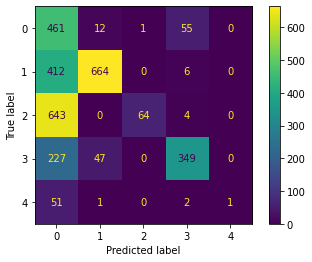



Class 0: precision=0.25697, recall=0.87146, f-measure=0.39690, true labels=529
Class 1: precision=0.91713, recall=0.61368, f-measure=0.73533, true labels=1082
Class 2: precision=0.98462, recall=0.09001, f-measure=0.16495, true labels=711
Class 3: precision=0.83894, recall=0.56019, f-measure=0.67180, true labels=623
Class 4: precision=1.00000, recall=0.01818, f-measure=0.03571, true labels=55

Accuracy = 0.513
Macro Precision = 0.79953
Macro Recall = 0.4307
Marco F-measure = 0.55983



In [ ]:
list_y1 = []
list_pred1 = []

validation_predictions = model.predict(X_test)
count = 0
for i in range(0,len(validation_predictions)):
  for j in range(0, len(validation_predictions[i])):
    if validation_predictions[i][j] == max(validation_predictions[i]):
      count = j
    else:
      count = count
  for j in range(0, len(validation_predictions[i])):
    validation_predictions[i][j] = 0
    validation_predictions[i][count] = 1      
print(validation_predictions, validation_predictions.shape)
print(y_test, y_test_kf.shape)

for i in range(0,len(validation_predictions)):
   for j in range(0, len(validation_predictions[i])):
     if y_test[i][j] !=0:
        list_y1.append(j)
     if validation_predictions[i][j] != 0:
        list_pred1.append(j)
        
#  print("%%%%%%%%%%%%%%%%%%%%%%%%%%")
#  print(list_y, list_pred)
#  print(len(list_y), len(list_pred))
#  print("%%%%%%%%%%%%%%%%%%%%%%%%%%")

score=float("{:.5f}".format(accuracy_score(list_y1, list_pred1)))               
print("\nFold " + str(k+1) +": \n")   
                                     
print("Confusion matrix"+"\n")
cm=confusion_matrix(list_y1, y_pred = list_pred1, labels= svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= svc.classes_)
disp.plot()
plt.show() 
print("\n")

meas = precision_recall_fscore_support(list_y1, list_pred1, average=None)
precision, recall = [],[]
for i in range(len(svc.classes_)):
    print("Class {0:d}: precision={1:5.5f}, recall={2:5.5f}, f-measure={3:5.5f}, true labels={4}".format(i, meas[0][i], meas[1][i], meas[2][i], meas[3][i]))
    precision.append(meas[0][i]) 
    recall.append(meas[1][i])
      
macro_precision = float("{:.5f}".format(statistics.mean(precision))) 
macro_recall = float("{:.5f}".format(statistics.mean(recall)))
macro_fmeasure = float("{:.5f}".format((2*macro_precision*macro_recall)/(macro_precision + macro_recall)))
  
scores.append(score)
precision.clear()
recall.clear()
  
print("\nAccuracy = " +str(score) + "\nMacro Precision = "+str(macro_precision)+"\nMacro Recall = "+str(macro_recall)+"\nMarco F-measure = "+str(macro_fmeasure)+"\n")

<p align="justify">After having trained our selected models on the 6.000 nevers seen istances, we can recap all the scores we have achieved.

|    MODEL     |     ---\|    |  \|--- |  ---  | **OVERALL MEASURES (on 60k train records and 12k test)** | ---  |  ---\|   |
|:--------------:|:-------------:|:---------:|:---------:|:-------------------------------------:|:---------:|:--------------:|
|                |     <font color = "orange"> **Type**          | <font color = "orange"> **Accuracy** |<font color = "orange"> **Precision** |    <font color = "orange">    **Recall**  |<font color = "orange"> **F-measure** | <font color = "orange">**Run Time (60k)**|
|    <font color = "orange"> **KNN**    | **_Ks = 3_**  |  0.5115  |  0.71386  |                0.44593              |  0.54895  |    53.893s   |
|         <font color = "orange">     **KERNEL SVM**                     | **_Type: RBF_** | 0.51083 | 0.68536 | 0.42898 | 0.52768 |  28.317 s |
|   <font color = "orange">     **NEURAL NETWORKS**        | **_CNN_**            |  0.513      |  0.79953       |  0.4307       |  0.55983       |    360.657 s       |

<p align="justify"> As we expected, our predictions are actually not so good (but the models seem to be actually well-build, as the predictions still surclass the random picking of quite a few).

## <center><font color='orange'> **CHAPTER 8: CONCLUSIONS** </font></center>

<p align="justify">In conclusion, it is possible to express some reflections on what are the most performing algorithms that we have applied to the test set.
In this sense, looking at the evaluation measures adopted, we can see an accuracy of around 50%, a precision between 70% and 80% and a recall between 40% and 45%.

<p align="justify">the first measure indicates that, generally, the applied model rates correctly the log class in half of the cases (being a 5-class classification, the benchmark of the random prediction was 20%, but despite this the results are disappointing compared with the training ones).

<p align="justify">The high precision values, on the other hand, demonstrates how the model behaves correctly when expressing a prediction, since for most classes it represents the correct response.
<b> To greatly lower this measure, it is the precision of the "Normal-log" class, which settles on values ​​well below the average </b>.

<p align="justify">This is because of the differences between training and test sets: in fact, the dataset used as training set turns out to be strongly unbalanced in favor of "Normal" class. This induces the model to parameterize itself by learning that the largest part of the logs is of the "Normal" category and, consequently, once we have seen a more homogenous set (such as the test one),<b> the model generalizes little by making many more predictions than the "Normal" class. than due</b>.

<p align="justify"> Finally, recall, that is the measure of how much correct classifications the model is lost (false negatives), is the lowest value, since, like the precision, <b>it is heavily polluted by the strong presence in the training set of the "Normal" class</b>.

<p align="justify">As a final result, ultimately, we get a model that generalizes little due to imbalance in training, however, very reliable when making a prediction, unless for the "Normal" class.

<p align="justify"> Furthermore, among the models selected in Model Selection, the most performing is <b>CNN, which proves to geeneralize better than the others, despite not being preceded by PCA, as its intermediate layers already carry out an autonomous data embedding</b>.